# 1. File Preperation 

In [1]:
# Importing Packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.patches as mpatches
from scipy.stats import pearsonr


In [2]:
# Define the font properties
#font = {'family': 'sans-serif',
       # 'size': 14}

# Apply the font settings globally for Matplotlib
#plt.rc('font', **font)

# Apply the font settings globally for Seaborn
#sns.set_context("notebook", rc={"font.family": font['family'], "font.size": font['size']})


In [3]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [4]:
# Importing Data
data_hedonic_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final.csv')
data_utilitarian_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final.csv')

In [5]:
# Filtering after only helpful reviews
data_hedonic = data_hedonic_raw[data_hedonic_raw['helpful_vote'] != 0]
data_utilitarian = data_utilitarian_raw[data_utilitarian_raw['helpful_vote'] != 0]

In [6]:
# Combining data in one dataframe
data= pd.concat([data_hedonic_raw, data_utilitarian_raw])

data_helpful = data[data['helpful_vote'] != 0]


# 2. Statistic of features

First of all we want to look at different features that could be extracted from the review data. Therefore I built some functions for easier data handling and statistical analysis of the features. 

## Functions for Building Summary statistic 

In [7]:
# Convert Sentiment_Classification to Numerical
sentiment_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}

# Map the sentiment column to numerical values
data_helpful['SentimentC'] = data_helpful['Sentiment_Classification'].map(sentiment_mapping)
data['SentimentC'] = data['Sentiment_Classification'].map(sentiment_mapping)

data_utilitarian['SentimentC'] = data_utilitarian['Sentiment_Classification'].map(sentiment_mapping)
data_hedonic['SentimentC'] = data_hedonic['Sentiment_Classification'].map(sentiment_mapping)
data_hedonic_raw['SentimentC'] = data_hedonic_raw['Sentiment_Classification'].map(sentiment_mapping)
data_utilitarian_raw['SentimentC'] = data_utilitarian_raw['Sentiment_Classification'].map(sentiment_mapping)

In [8]:
# Function for building summary statistics for numerical columns

def summary_statistic(df, groupby_column):
    # Define the numerical columns for which summary statistics will be calculated
    numerical_columns = ['Rating','RewExt','Sentiment','Subjective', 'WordC', 'SentC', 'SentL', 'TitleL', 'ElapDays',
            'Image', 'VerPur', 'NounR', 'AdjR', 'AdvR', 'FRE']

    # Group by given column and calculate aggregate statistics
    summary_stats = df.groupby(groupby_column)[numerical_columns].agg(['mean', 'median', 'std'])

    # Flatten MultiIndex columns
    summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]

    # Transposing the DataFrame
    summary_stats = summary_stats.transpose()

    return summary_stats

In [9]:
# Only calculate for the mean of the numerical columns

def calculate_mean(df, groupby_column):
    # Group by the specified column and calculate aggregate statistics
    summary_mean = df.groupby(groupby_column).agg({
        'helpful_ratio': ['mean'],  # Calculate the mean of the 'helpful_ratio' column
        'Rating': ['mean'],
        'RewExt': ['mean'],
        'Sentiment': ['mean'],
        'Subjective': ['mean'],
        'ElapDays': ['mean'],
        'WordC': ['mean'],
        'SentC': ['mean'],
        'SentL': ['mean'],
        'TitleL': ['mean'],
        'FRE': ['mean'],
        'AdjR': ['mean'],
        'AdvR': ['mean'],
        'NounR': ['mean'],
    })

    # Flatten the MultiIndex columns
    summary_mean.columns = ['_'.join(col).strip() for col in summary_mean.columns.values]

    # Transpose the DataFrame
    summary_mean = summary_mean.transpose()

    return summary_mean

### Summary Statistic of Helpful Reviews

In the following, a straightforward statistical analysis is conducted without graphical representation, focusing on various factors such as product type or main category.

In [10]:
# Summary of data after helpful reviews
summary_stats_helpful = calculate_mean(data_helpful, 'prod_type')

# Display the DataFrame
print(summary_stats_helpful)

# Saving to CSV
summary_stats_helpful.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_ProdType_mean.csv')

prod_type                     0            1
helpful_ratio_mean     0.001361     0.001243
Rating_mean            2.763785     3.832505
RewExt_mean           -1.853574    -0.757831
Sentiment_mean         2.800204     3.903045
Subjective_mean        0.776553     0.822067
ElapDays_mean       1090.369639  1647.519577
WordC_mean            64.234513    53.893412
SentC_mean             4.148741     3.866377
SentL_mean            17.176330    15.519439
TitleL_mean            1.269231     1.361405
FRE_mean              78.763465    83.127085
AdjR_mean              0.093711     0.098915
AdvR_mean              0.080119     0.071189
NounR_mean             0.189479     0.182510


In [11]:
# Summary of data after helpful reviews
summary_stats_helpful = calculate_mean(data_helpful, 'main_category')

# Display the DataFrame
print(summary_stats_helpful)

# Saving to CSV
summary_stats_helpful.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_Category_mean.csv')

main_category        Appliances       Beauty  Electronics   Household  \
helpful_ratio_mean     0.001441     0.000849     0.001296    0.001427   
Rating_mean            2.476945     4.029299     2.738172    3.104137   
RewExt_mean           -2.223055    -0.511635    -1.895334   -1.395863   
Sentiment_mean         2.540346     4.076433     2.753727    3.159772   
Subjective_mean        0.782660     0.822641     0.770538    0.783746   
ElapDays_mean       1259.439481  1924.447983  1378.546986  288.669044   
WordC_mean            65.724784    50.067516    76.683085   35.358060   
SentC_mean             4.582133     3.705732     4.500972    2.944365   
SentL_mean            16.680019    15.415137    18.657825   14.406705   
TitleL_mean            1.276657     1.264544     1.244329    1.316690   
FRE_mean              76.810620    83.340144    77.264563   83.996106   
AdjR_mean              0.077548     0.101336     0.088839    0.120437   
AdvR_mean              0.071440     0.073082     0.

In [12]:
# Summary of data after helpful reviews
summary_help_hedonic = calculate_mean(data_hedonic, 'Prod')

# Display the DataFrame
print(summary_help_hedonic)

# Saving to CSV
summary_help_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_Hedonic_mean.csv')

Prod                Facial Spray       Music      Perfume  Video Games
helpful_ratio_mean      0.000719    0.002427     0.001037     0.002217
Rating_mean             4.125809    2.788835     3.890041     3.758315
RewExt_mean            -0.374191   -1.854369    -0.709959    -1.041685
Sentiment_mean          4.186916    3.099515     3.917012     3.731707
Subjective_mean         0.827764    0.834365     0.815249     0.807833
ElapDays_mean        1931.848311  761.276699  1913.769710  1011.079823
WordC_mean             49.456506   59.092233    50.949170    69.121951
SentC_mean              3.653487    4.555825     3.781120     4.075388
SentL_mean             14.895422   14.342856    16.165057    17.138913
TitleL_mean             1.258807    1.771845     1.272822     1.492239
FRE_mean               82.821280   83.102015    84.088838    82.037450
AdjR_mean               0.099294    0.102463     0.104282     0.083032
AdvR_mean               0.072097    0.068645     0.074505     0.063625
NounR_

In [13]:
# Summary of data after helpful reviews
summary_help_ut = calculate_mean(data_utilitarian, 'Prod')

# Display the DataFrame
print(summary_help_ut)

# Saving to CSV
summary_help_ut.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_Utilitarian_mean.csv')

Prod                    Battery       Filter  Gaming Mouse  Toilet Paper
helpful_ratio_mean     0.000975     0.001441      0.001934      0.001427
Rating_mean            2.823587     2.476945      2.568665      3.104137
RewExt_mean           -1.776413    -2.223055     -2.131335     -1.395863
Sentiment_mean         2.811891     2.540346      2.638298      3.159772
Subjective_mean        0.758146     0.782660      0.795130      0.783746
ElapDays_mean       1600.761209  1259.439481    937.557060    288.669044
WordC_mean            56.302144    65.724784    117.129594     35.358060
SentC_mean             3.787524     4.582133      5.916828      2.944365
SentL_mean            16.494291    16.680019     22.951416     14.406705
TitleL_mean            1.277778     1.276657      1.177950      1.316690
FRE_mean              78.741764    76.810620     74.333017     83.996106
AdjR_mean              0.087855     0.077548      0.090790      0.120437
AdvR_mean              0.086393     0.071440      0

### Analyzing Mean of Review Data

In [14]:
# Calculating Mean for Data after Main category 
summary_mean = calculate_mean(data, 'main_category')

# Display the summary statistics
print(summary_mean)

# Saving to CSV
summary_mean.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Category_mean.csv')

main_category        Appliances       Beauty  Electronics   Household  \
helpful_ratio_mean     0.000192     0.000138     0.000177    0.000551   
Rating_mean            3.976762     4.321394     3.864184    3.721058   
RewExt_mean           -0.723238    -0.234736    -0.771454   -0.778942   
Sentiment_mean         3.890148     4.352390     3.822784    3.689636   
Subjective_mean        0.784201     0.800577     0.778130    0.768247   
ElapDays_mean       1177.362397  1743.881320  1416.882535  300.789416   
WordC_mean            27.000576    26.390550    40.375089   24.408490   
SentC_mean             2.410793     2.415966     2.864982    2.319735   
SentL_mean            11.528881    11.825923    14.509245   11.849565   
TitleL_mean            1.406952     1.506199     1.317021    1.444873   
FRE_mean              78.876121    86.893946    80.610742   85.062045   
AdjR_mean              0.125282     0.125501     0.112677    0.137185   
AdvR_mean              0.071905     0.073742     0.

In [15]:
# Calculating Mean after Producty Type and Data 
summary_stats_data = calculate_mean(data, 'prod_type')

# Print the summary statistics
print(summary_stats_data)

# Saving to CSV
summary_stats_data.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_ProdType_mean.csv')

prod_type                     0            1
helpful_ratio_mean     0.000219     0.000213
Rating_mean            3.882028     4.292919
RewExt_mean           -0.758478    -0.303533
Sentiment_mean         3.828753     4.315492
Subjective_mean        0.778878     0.801969
ElapDays_mean       1238.106825  1552.130690
WordC_mean            34.987159    27.749720
SentC_mean             2.681711     2.470676
SentL_mean            13.397644    11.915999
TitleL_mean            1.355281     1.543519
FRE_mean              80.558422    86.795107
AdjR_mean              0.118693     0.119600
AdvR_mean              0.083132     0.071048
NounR_mean             0.196290     0.190607


In [16]:
# Calculating Mean for hedonic products and product
summary_stats_hedonic = calculate_mean(data_hedonic, 'Prod')

# Display results
print(summary_stats_hedonic)

# Saving to CSV
summary_stats_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Hedonic_mean.csv')

Prod                Facial Spray       Music      Perfume  Video Games
helpful_ratio_mean      0.000719    0.002427     0.001037     0.002217
Rating_mean             4.125809    2.788835     3.890041     3.758315
RewExt_mean            -0.374191   -1.854369    -0.709959    -1.041685
Sentiment_mean          4.186916    3.099515     3.917012     3.731707
Subjective_mean         0.827764    0.834365     0.815249     0.807833
ElapDays_mean        1931.848311  761.276699  1913.769710  1011.079823
WordC_mean             49.456506   59.092233    50.949170    69.121951
SentC_mean              3.653487    4.555825     3.781120     4.075388
SentL_mean             14.895422   14.342856    16.165057    17.138913
TitleL_mean             1.258807    1.771845     1.272822     1.492239
FRE_mean               82.821280   83.102015    84.088838    82.037450
AdjR_mean               0.099294    0.102463     0.104282     0.083032
AdvR_mean               0.072097    0.068645     0.074505     0.063625
NounR_

In [17]:
# Calculating Mean for utilitarian products and product
summary_stats_utilitarian = calculate_mean(data_utilitarian, 'Prod')

# Display results
print(summary_stats_utilitarian)

# Saving to CSV
summary_stats_utilitarian.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Utilitarian_mean.csv')

Prod                    Battery       Filter  Gaming Mouse  Toilet Paper
helpful_ratio_mean     0.000975     0.001441      0.001934      0.001427
Rating_mean            2.823587     2.476945      2.568665      3.104137
RewExt_mean           -1.776413    -2.223055     -2.131335     -1.395863
Sentiment_mean         2.811891     2.540346      2.638298      3.159772
Subjective_mean        0.758146     0.782660      0.795130      0.783746
ElapDays_mean       1600.761209  1259.439481    937.557060    288.669044
WordC_mean            56.302144    65.724784    117.129594     35.358060
SentC_mean             3.787524     4.582133      5.916828      2.944365
SentL_mean            16.494291    16.680019     22.951416     14.406705
TitleL_mean            1.277778     1.276657      1.177950      1.316690
FRE_mean              78.741764    76.810620     74.333017     83.996106
AdjR_mean              0.087855     0.077548      0.090790      0.120437
AdvR_mean              0.086393     0.071440      0

### Total Analysis (mean, median, variance)

In [18]:
# Summary of hedonic data
summary_stats_hedonic = summary_statistic(data_hedonic_raw, 'Prod')

# Display the summary statistics
print(summary_stats_hedonic)

# Saving to CSV
summary_stats_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Hedonic.csv')


Prod               Facial Spray       Music      Perfume  Video Games
Rating_mean            4.308369    3.935466     4.331574     4.384584
Rating_median          5.000000    5.000000     5.000000     5.000000
Rating_std             1.264015    1.514960     1.228851     1.255547
RewExt_mean           -0.191631   -0.710887    -0.268426    -0.415416
RewExt_median          0.500000    0.200000     0.400000     0.200000
RewExt_std             1.264015    1.495043     1.228851     1.255547
Sentiment_mean         4.350447    3.953423     4.353908     4.360394
Sentiment_median       5.000000    5.000000     5.000000     5.000000
Sentiment_std          1.301683    1.517840     1.263092     1.308177
Subjective_mean        0.818202    0.815490     0.786802     0.800379
Subjective_median      0.908884    0.916730     0.883454     0.902480
Subjective_std         0.206639    0.227764     0.230703     0.236141
WordC_mean            30.877532   30.306958    22.883667    33.971710
WordC_median        

In [19]:
# Summary of utilitarian data
summary_stats_utilitarian = summary_statistic(data_utilitarian_raw, 'Prod')

# Display the DataFrame
print(summary_stats_utilitarian)

summary_stats_utilitarian.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Utilitarian.csv')

Prod                   Battery       Filter  Gaming Mouse  Toilet Paper
Rating_mean           3.900000     3.976762      3.799502      3.721058
Rating_median         5.000000     5.000000      5.000000      5.000000
Rating_std            1.552382     1.572562      1.561097      1.560484
RewExt_mean          -0.700000    -0.723238     -0.900498     -0.778942
RewExt_median         0.400000     0.300000      0.300000      0.500000
RewExt_std            1.552382     1.572562      1.561097      1.560484
Sentiment_mean        3.860744     3.890148      3.754229      3.689636
Sentiment_median      5.000000     5.000000      5.000000      5.000000
Sentiment_std         1.676241     1.661475      1.604700      1.637647
Subjective_mean       0.755289     0.784201      0.819381      0.768247
Subjective_median     0.830232     0.851860      0.885371      0.825344
Subjective_std        0.233592     0.209121      0.186372      0.205377
WordC_mean           27.602204    27.000576     63.442537     24

In [20]:
# Summary of data after Product Type
summary_stats_prodType = summary_statistic(data, 'prod_type')

# Display the DataFrame
print(summary_stats_prodType)

#Saving to CSV
summary_stats_prodType.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_ProdType.csv')

prod_type                    0            1
Rating_mean           3.882028     4.292919
Rating_median         5.000000     5.000000
Rating_std            1.562895     1.279392
RewExt_mean          -0.758478    -0.303533
RewExt_median         0.300000     0.400000
RewExt_std            1.562714     1.280379
Sentiment_mean        3.828753     4.315492
Sentiment_median      5.000000     5.000000
Sentiment_std         1.653995     1.313388
Subjective_mean       0.778878     0.801969
Subjective_median     0.850847     0.898295
Subjective_std        0.215621     0.223715
WordC_mean           34.987159    27.749720
WordC_median         19.000000    16.000000
WordC_std            49.733511    40.344515
SentC_mean            2.681711     2.470676
SentC_median          2.000000     2.000000
SentC_std             2.538221     2.244247
SentL_mean           13.397644    11.915999
SentL_median         11.200000    10.000000
SentL_std            10.267101     8.612726
TitleL_mean           1.355281  

# 3. Correlation Analysis


In [26]:
features =  ['helpful_ratio','Rating','RewExt','Sentiment','Subjective', 'ElapDays',
            'Image', 'VerPur','WordC', 'SentC', 'SentL', 'TitleL',  'NounR', 'AdjR', 'AdvR', 'FRE']

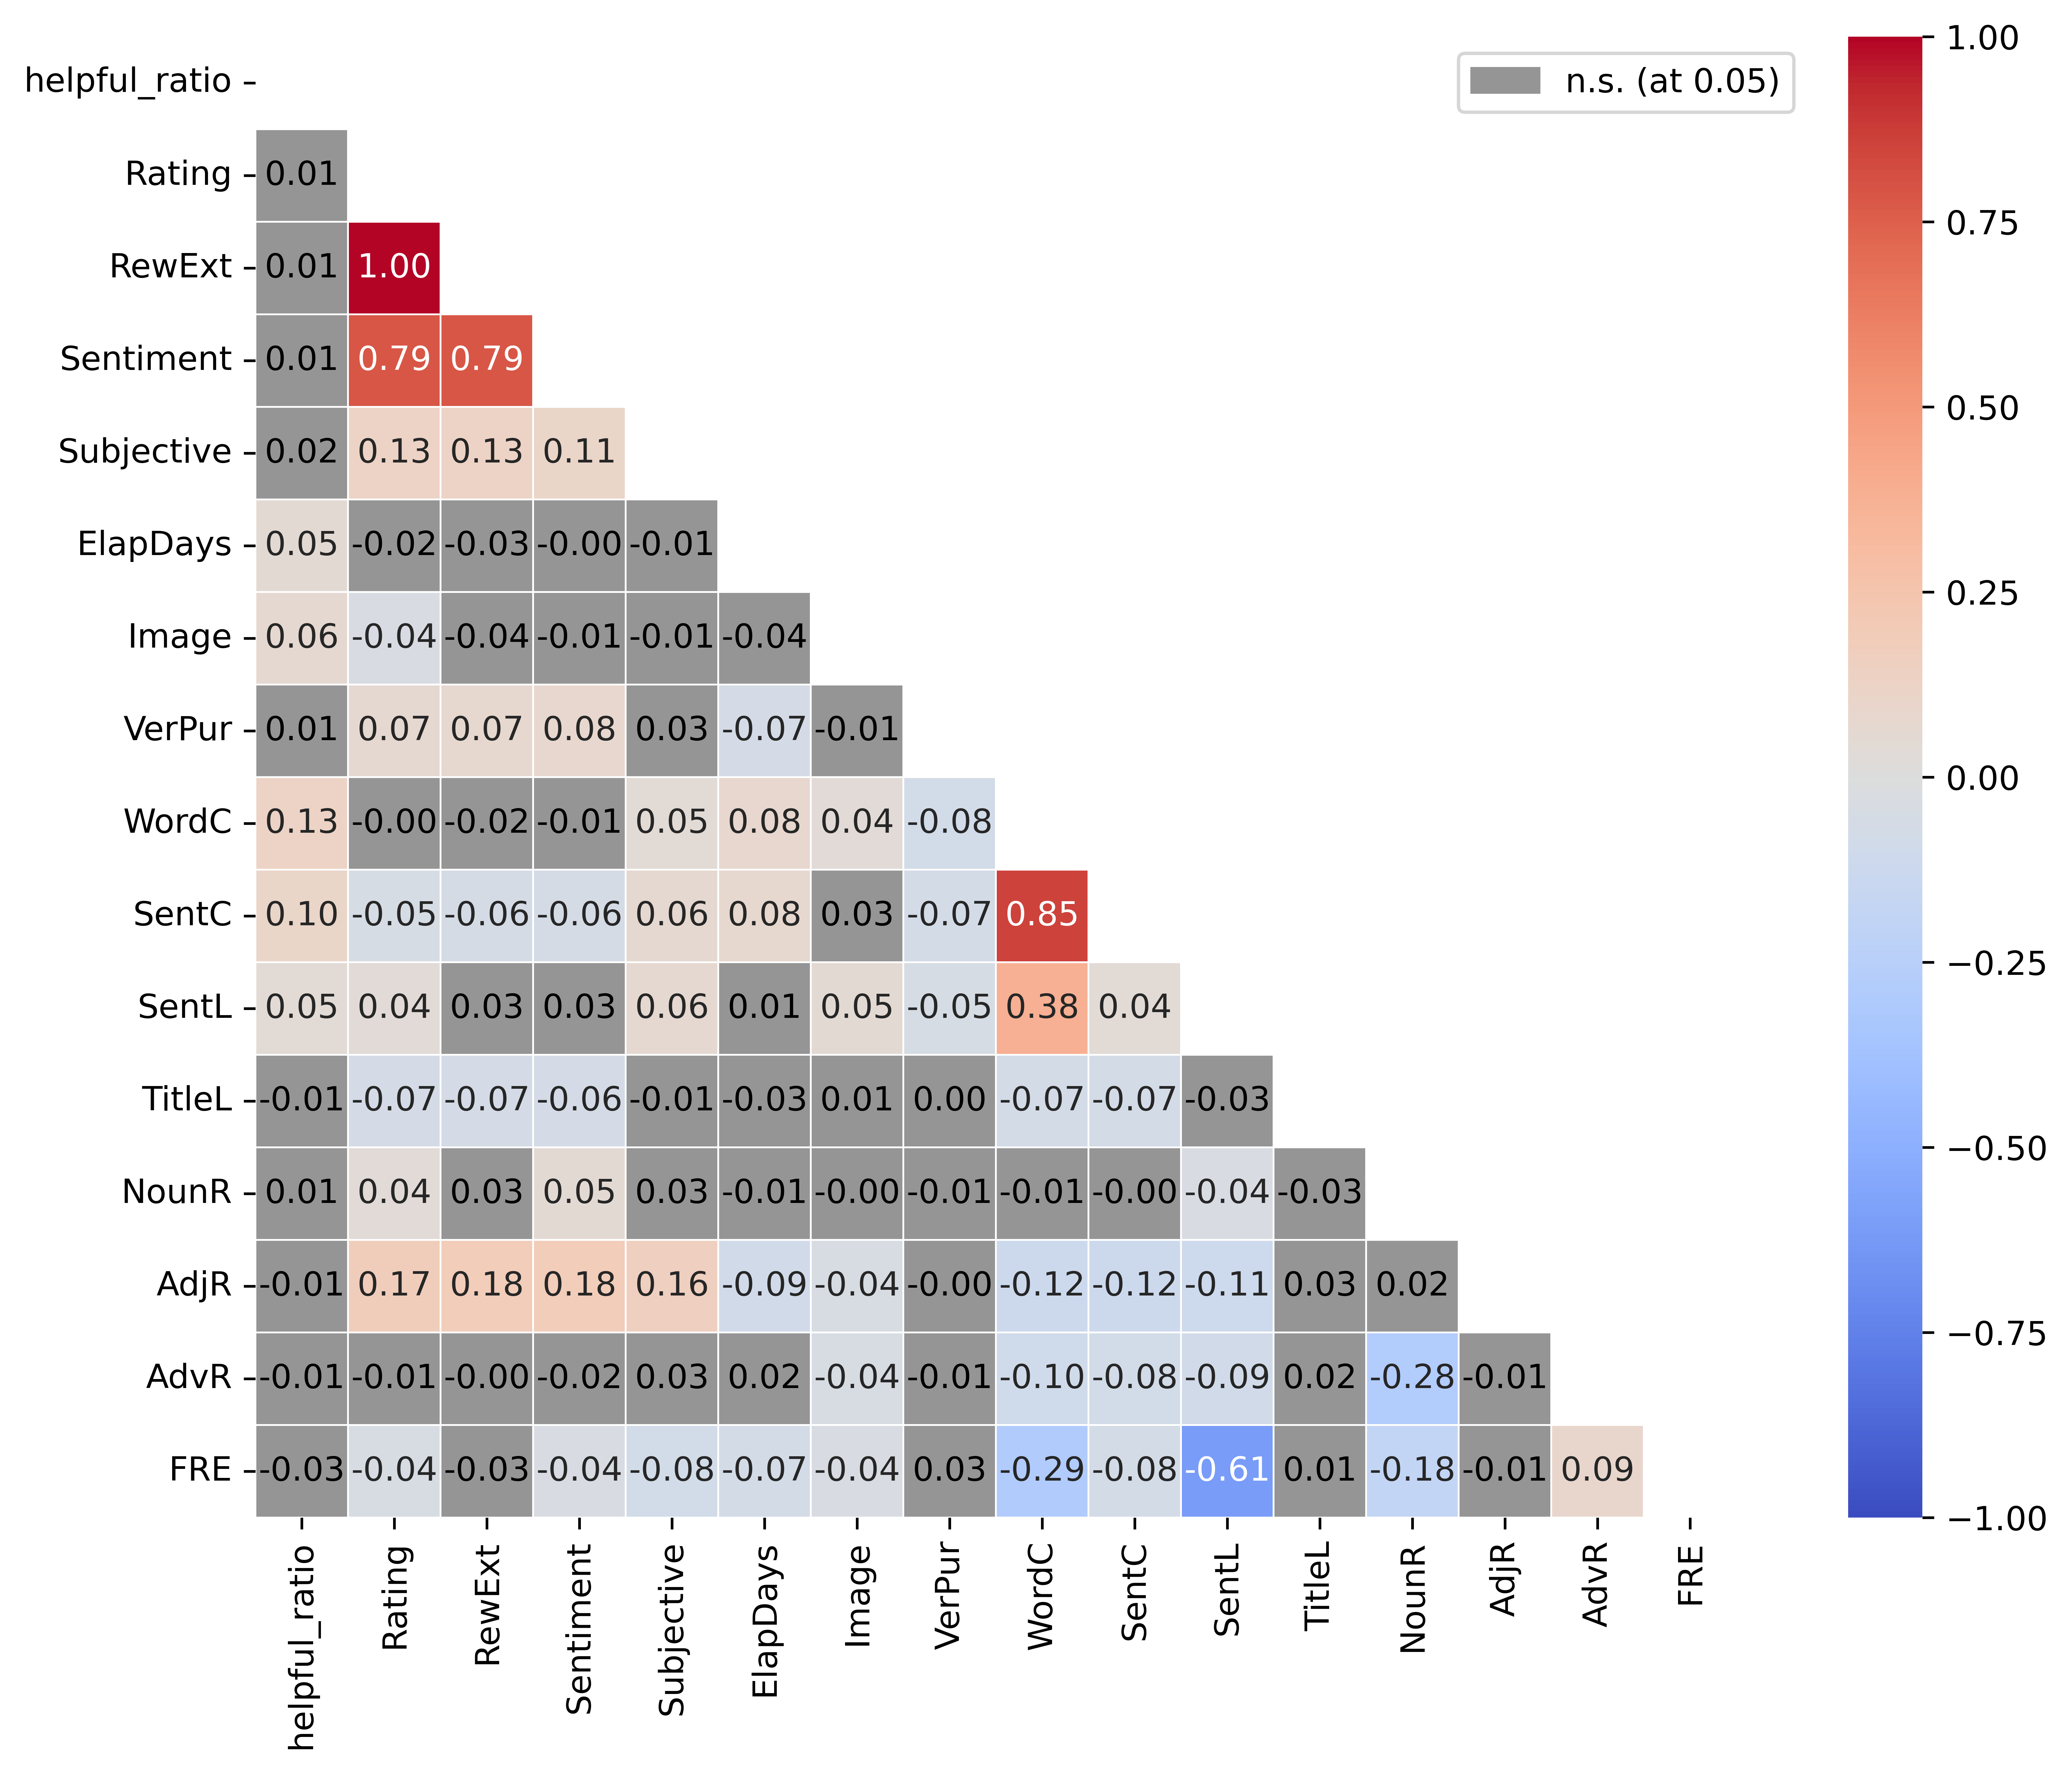

In [27]:

# Calculate correlation matrix for utilitarian data
corr_matrix_uti = data_utilitarian[features].corr()

# Calculate p-values for each pair of variables
p_values = np.zeros_like(corr_matrix_uti.values)
for i in range(len(features)):
    for j in range(len(features)):
        if i != j:
            _, p_val = pearsonr(data_utilitarian[features[i]], data_utilitarian[features[j]])
            p_values[i, j] = p_val
        else:
            p_values[i, j] = 1  # Diagonal elements set to 1 to avoid masking

# Set significance level
alpha = 0.05

# Create a mask for non-significant correlations
mask_sig = p_values >= alpha

# Create a mask to display only the lower triangle
mask_upper = np.triu(np.ones_like(corr_matrix_uti, dtype=bool))

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8), dpi=800)

# Create the main heatmap with the custom colormap for significant correlations
sns.heatmap(corr_matrix_uti, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True, 
            vmin=-1, vmax=1, mask=mask_upper | mask_sig, linewidths=0.5)

# Overlay non-significant correlations in grey
non_sig_cmap = sns.color_palette("Greys", n_colors=1)  # Only two colors: light grey and white
sns.heatmap(corr_matrix_uti, annot=True, cmap=non_sig_cmap, fmt=".2f", 
            square=True, cbar=False, mask=mask_upper | ~mask_sig, linewidths=0.5, annot_kws={"color": "black"})

# Add a legend for the grey color
grey_patch = mpatches.Patch(color=non_sig_cmap[0], label=f"n.s. (at {alpha})")
plt.legend(handles=[grey_patch], bbox_to_anchor=(1.05, 1), loc=0)

plt.show()

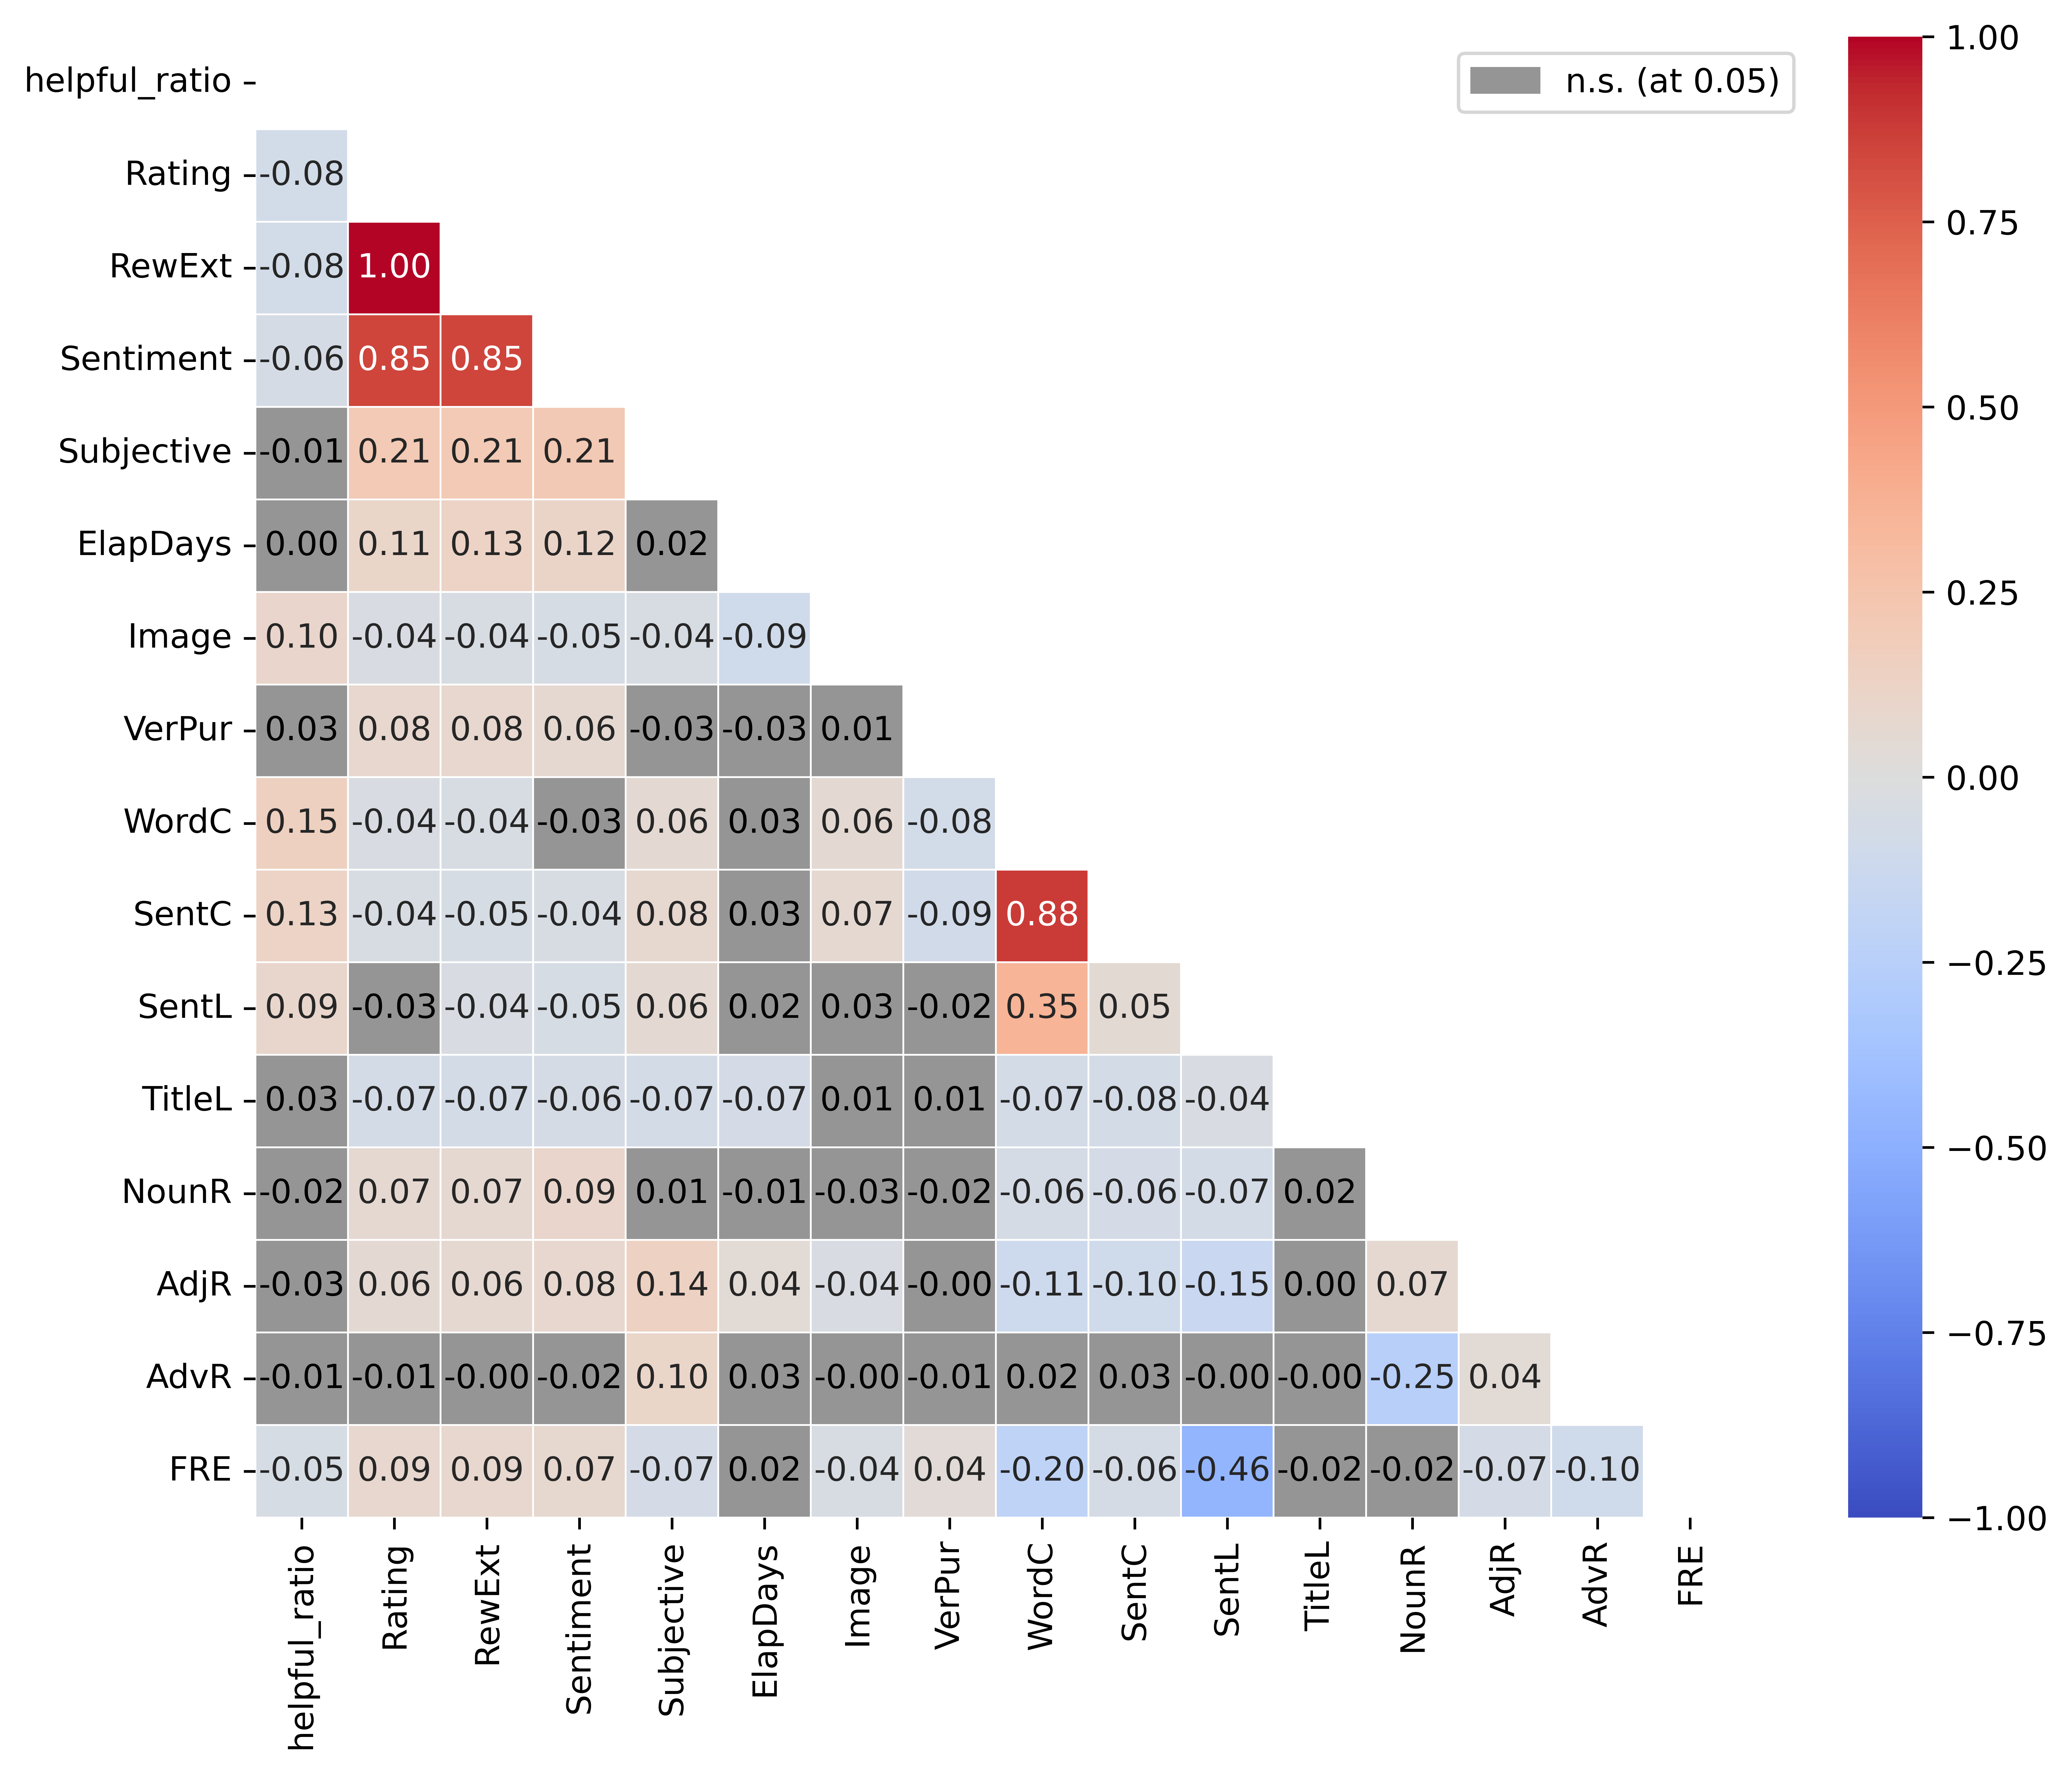

In [28]:
# Calculate correlation matrix
corr_matrix_hed = data_hedonic[features].corr()

# Calculate p-values for each pair of variables
p_values = np.zeros_like(corr_matrix_hed.values)
for i in range(len(features)):
    for j in range(len(features)):
        if i != j:
            _, p_val = pearsonr(data_hedonic[features[i]], data_hedonic[features[j]])
            p_values[i, j] = p_val
        else:
            p_values[i, j] = 1  # Diagonal elements set to 1 to avoid masking

# Set significance level
alpha = 0.05

# Create a mask for non-significant correlations
mask_sig = p_values >= alpha

# Create a mask to display only the lower triangle
mask_upper = np.triu(np.ones_like(corr_matrix_hed, dtype=bool))

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8), dpi=800)

# Create the main heatmap with the custom colormap for significant correlations
sns.heatmap(corr_matrix_hed, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True, 
            vmin=-1, vmax=1, mask=mask_upper | mask_sig, linewidths=0.5)

# Overlay non-significant correlations in grey
non_sig_cmap = sns.color_palette("Greys", n_colors=1)  # Only two colors: light grey and white
sns.heatmap(corr_matrix_hed, annot=True, cmap=non_sig_cmap, fmt=".2f", 
            square=True, cbar=False, mask=mask_upper | ~mask_sig, linewidths=0.5, annot_kws={"color": "black"})

# Add a legend for the grey color
grey_patch = mpatches.Patch(color=non_sig_cmap[0], label=f"n.s. (at {alpha})")
plt.legend(handles=[grey_patch], bbox_to_anchor=(1.05, 1), loc=0)


plt.show()


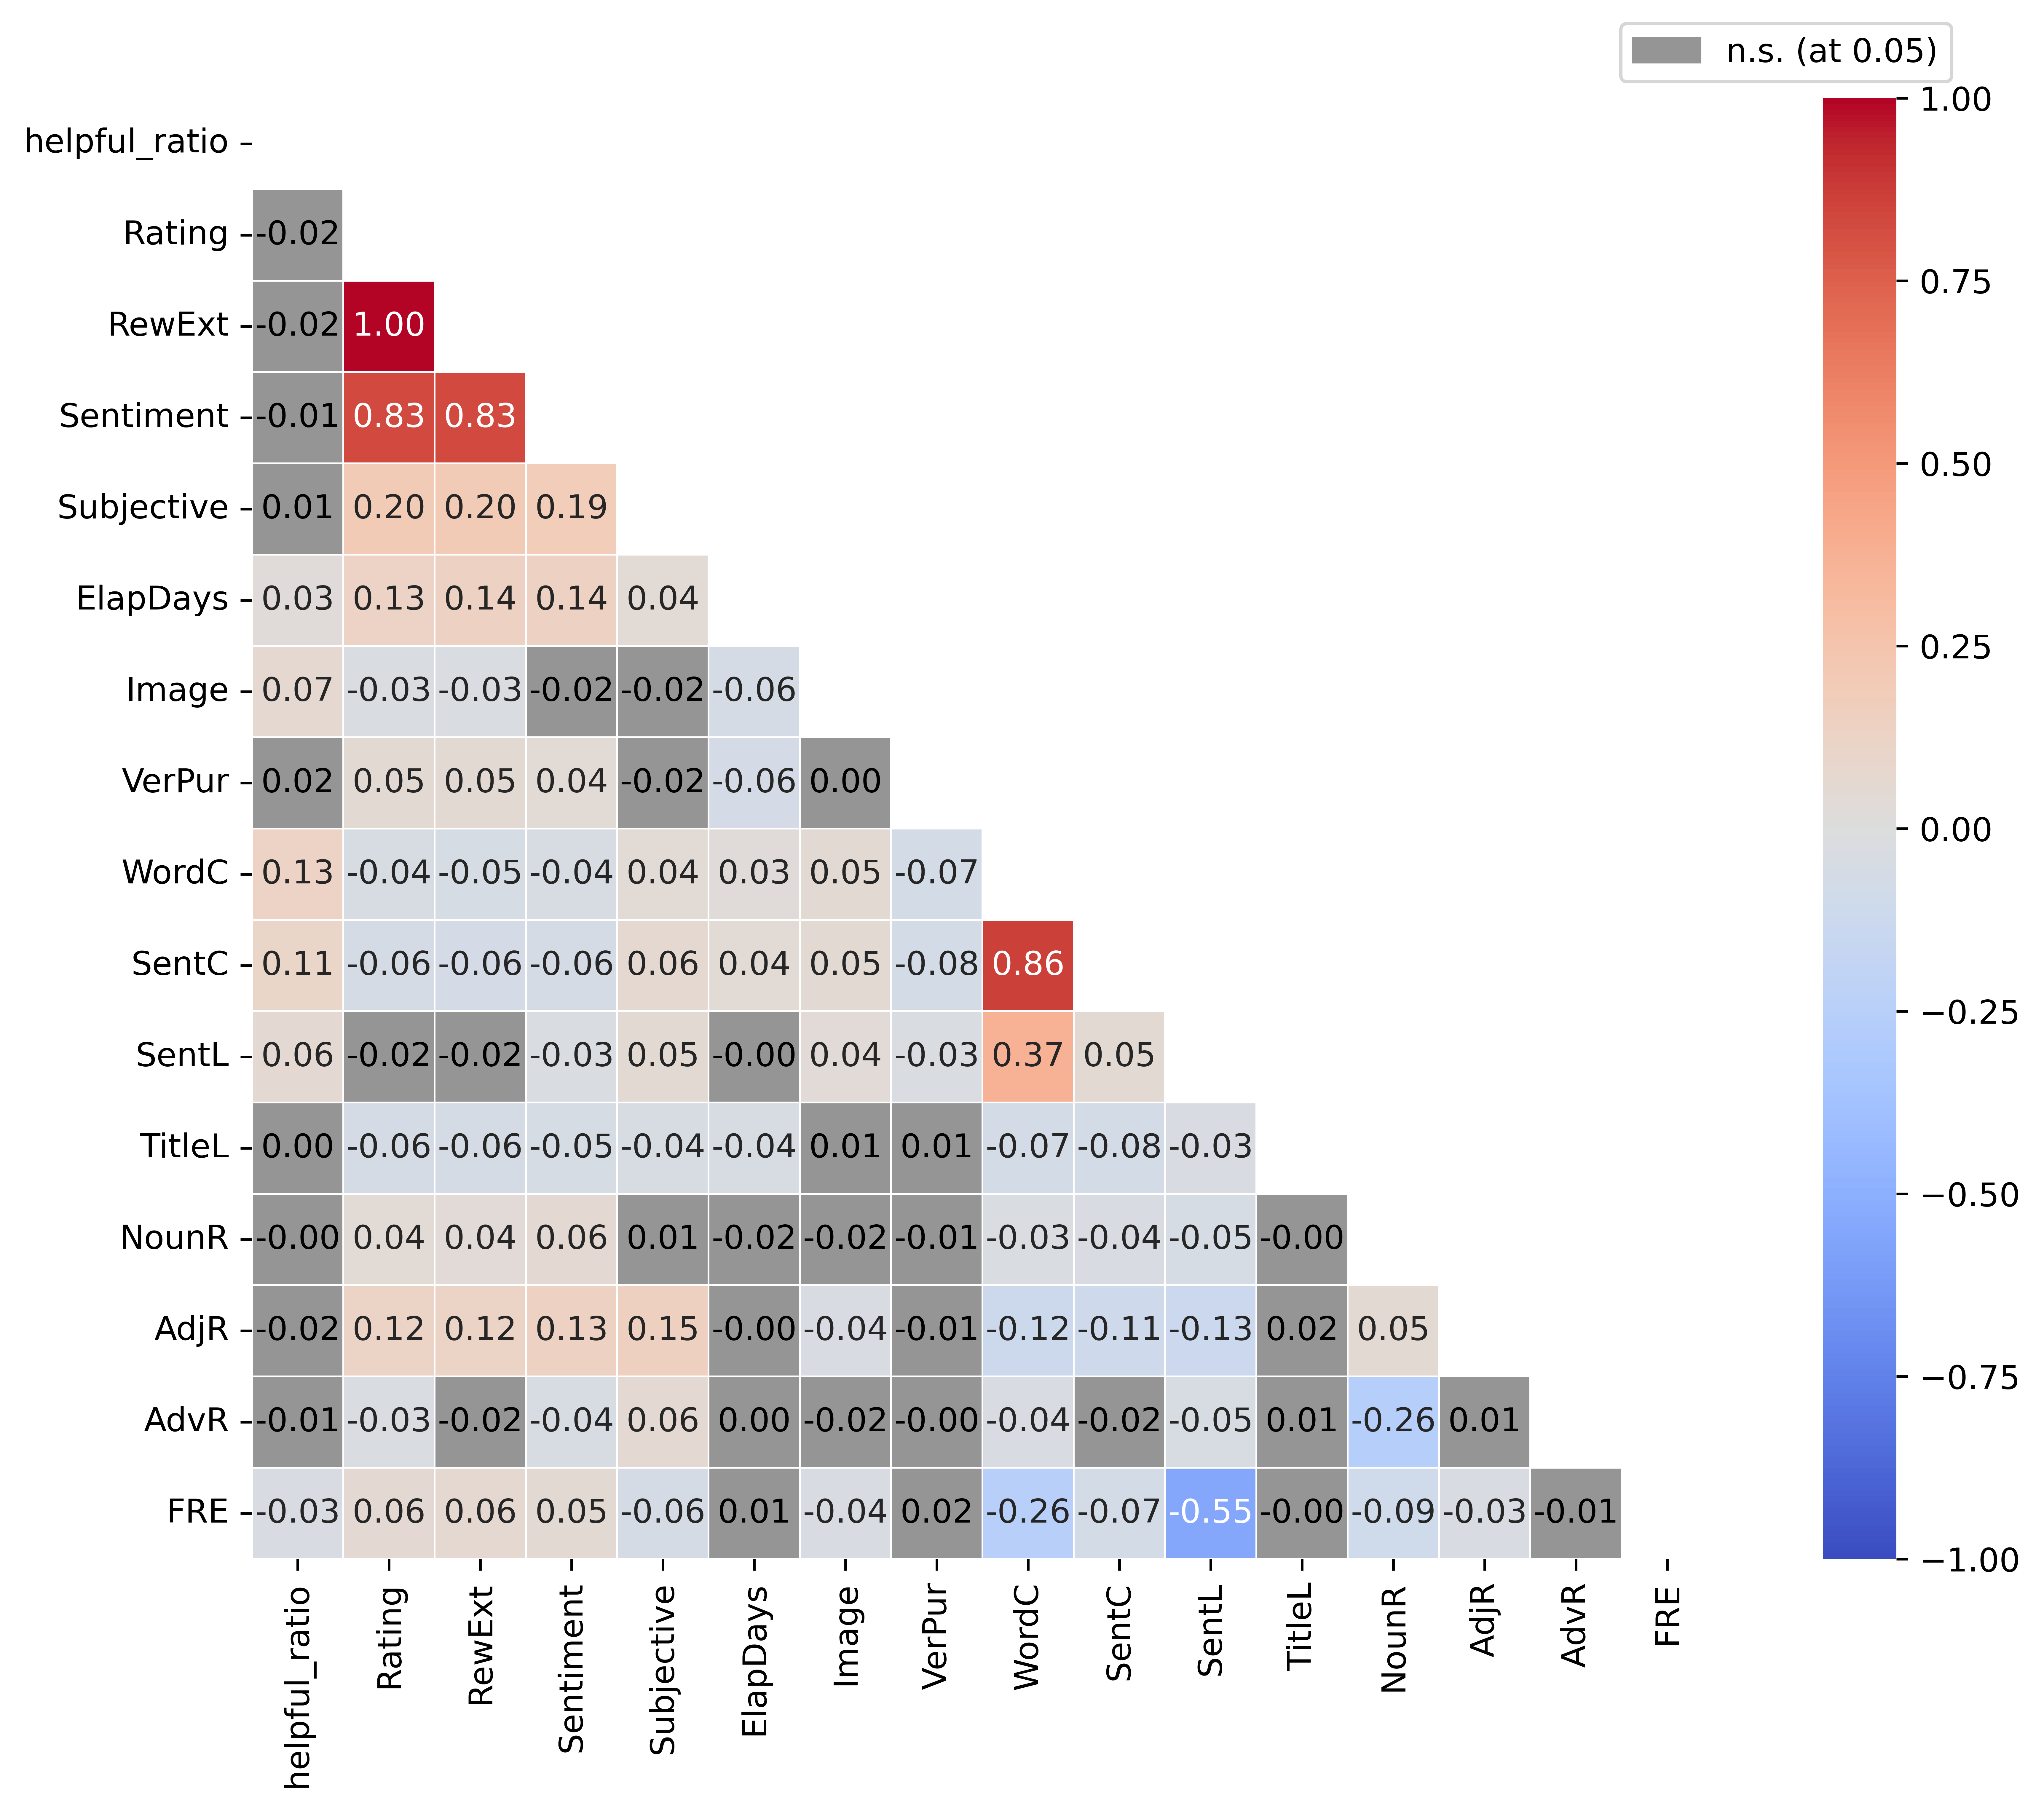

In [29]:
# Calculate correlation matrix
corr_matrix_total= data_helpful[features].corr()

# Calculate p-values for each pair of variables
p_values = np.zeros_like(corr_matrix_total.values)
for i in range(len(features)):
    for j in range(len(features)):
        if i != j:
            _, p_val = pearsonr(data_helpful[features[i]], data_helpful[features[j]])
            p_values[i, j] = p_val
        else:
            p_values[i, j] = 1  # Diagonal elements set to 1 to avoid masking

# Set significance level
alpha = 0.05

# Create a mask for non-significant correlations
mask_sig = p_values >= alpha

# Create a mask to display only the lower triangle
mask_upper = np.triu(np.ones_like(corr_matrix_total, dtype=bool))

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8), dpi=800)

# Create the main heatmap with the custom colormap for significant correlations
sns.heatmap(corr_matrix_total, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True, 
            vmin=-1, vmax=1, mask=mask_upper | mask_sig, linewidths=0.5)

# Overlay non-significant correlations in grey
non_sig_cmap = sns.color_palette("Greys", n_colors=1)  # Only two colors: light grey and white
sns.heatmap(corr_matrix_total, annot=True, cmap=non_sig_cmap, fmt=".2f", 
            square=True, cbar=False, mask=mask_upper | ~mask_sig, linewidths=0.5, annot_kws={"color": "black"})

# Add a legend for the grey color
grey_patch = mpatches.Patch(color=non_sig_cmap[0], label=f"n.s. (at {alpha})")
plt.legend(handles=[grey_patch], bbox_to_anchor=(1.05, 1), loc='lower center')


plt.show()

In [31]:
from scipy.stats import pearsonr

# Calculate correlation coefficient and p-value
correlation, p_value = pearsonr(data_utilitarian['FRE'], data_utilitarian['Rating'])

print("Correlation coefficient between sentiment and rating:", correlation)
print("P-value:", p_value)


Correlation coefficient between sentiment and rating: -0.04227300001917306
P-value: 0.02194108883038711


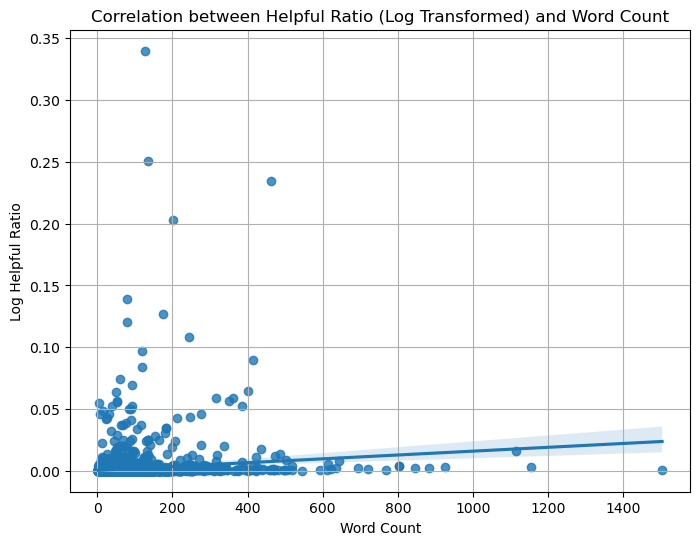

Correlation Coefficient: 0.13503872889376972


In [33]:
# Apply log transformation to 'Helpful_ratio'
data_helpful['log_Helpful_ratio'] = np.log(data_helpful['helpful_ratio'] + 1)  # Adding 1 to avoid log(0)

# Plot correlation scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='WordC', y='log_Helpful_ratio', data=data_helpful)
plt.title('Correlation between Helpful Ratio (Log Transformed) and Word Count')
plt.xlabel('Word Count')
plt.ylabel('Log Helpful Ratio')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation_coefficient = data_helpful['WordC'].corr(data_helpful['log_Helpful_ratio'])
print("Correlation Coefficient:", correlation_coefficient)



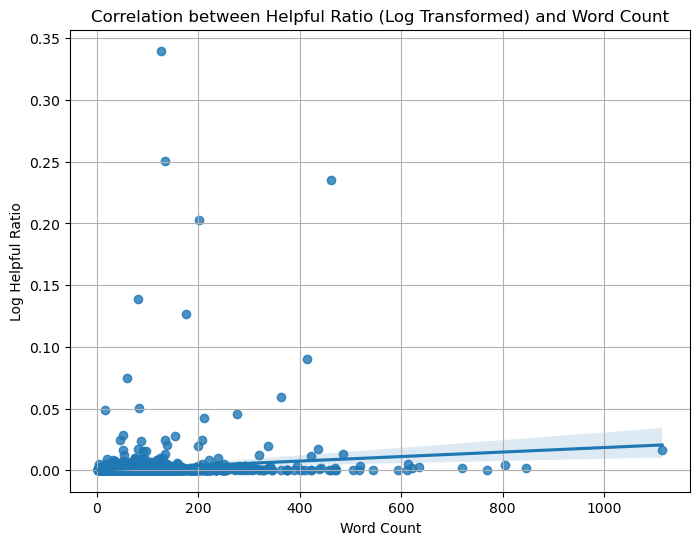

Correlation Coefficient: 0.13199348557804438


In [35]:
# Apply log transformation to 'Helpful_ratio'
data_utilitarian['log_Helpful_ratio'] = np.log(data_utilitarian['helpful_ratio'] + 1)  # Adding 1 to avoid log(0)

# Plot correlation scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='WordC', y='log_Helpful_ratio', data=data_utilitarian)
plt.title('Correlation between Helpful Ratio (Log Transformed) and Word Count')
plt.xlabel('Word Count')
plt.ylabel('Log Helpful Ratio')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation_coefficient = data_utilitarian['WordC'].corr(data_utilitarian['log_Helpful_ratio'])
print("Correlation Coefficient:", correlation_coefficient)


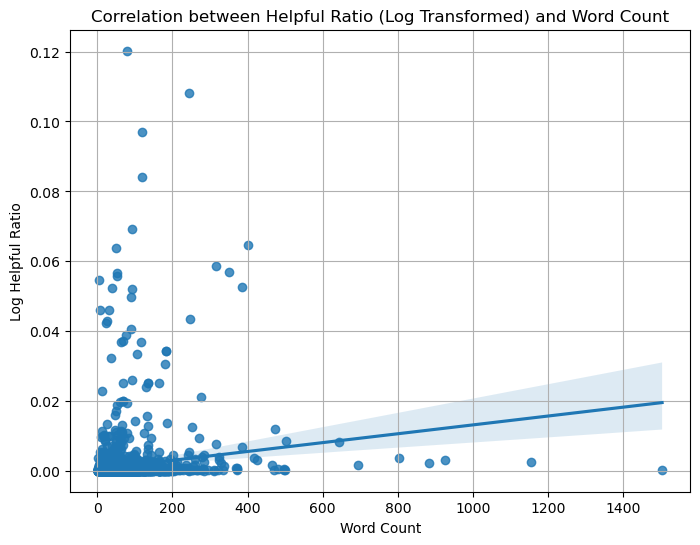

Correlation Coefficient: 0.15178603803275423


In [36]:
# Apply log transformation to 'Helpful_ratio'
data_hedonic['log_Helpful_ratio'] = np.log(data_hedonic['helpful_ratio'] + 1)  # Adding 1 to avoid log(0)

# Plot correlation scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='WordC', y='log_Helpful_ratio', data=data_hedonic)
plt.title('Correlation between Helpful Ratio (Log Transformed) and Word Count')
plt.xlabel('Word Count')
plt.ylabel('Log Helpful Ratio')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation_coefficient = data_hedonic['WordC'].corr(data_hedonic['log_Helpful_ratio'])
print("Correlation Coefficient:", correlation_coefficient)


# 4. Graphs and Plots for Data analysis 

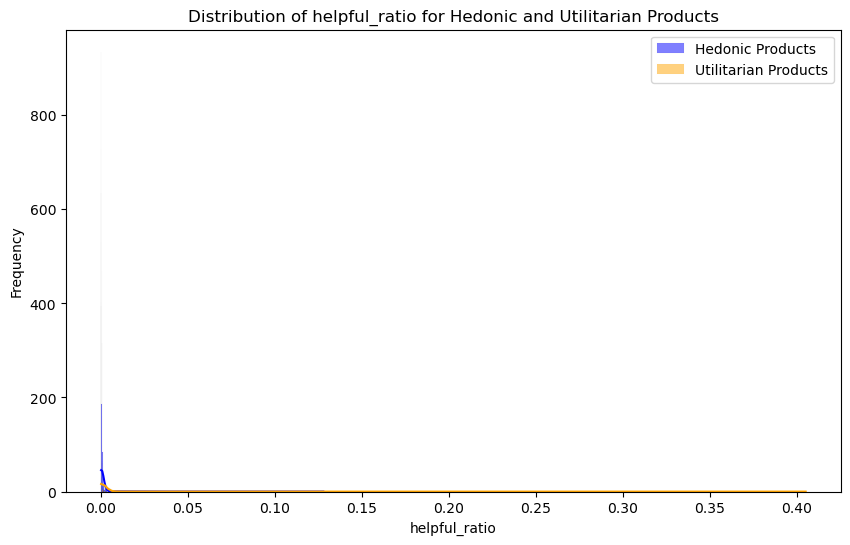

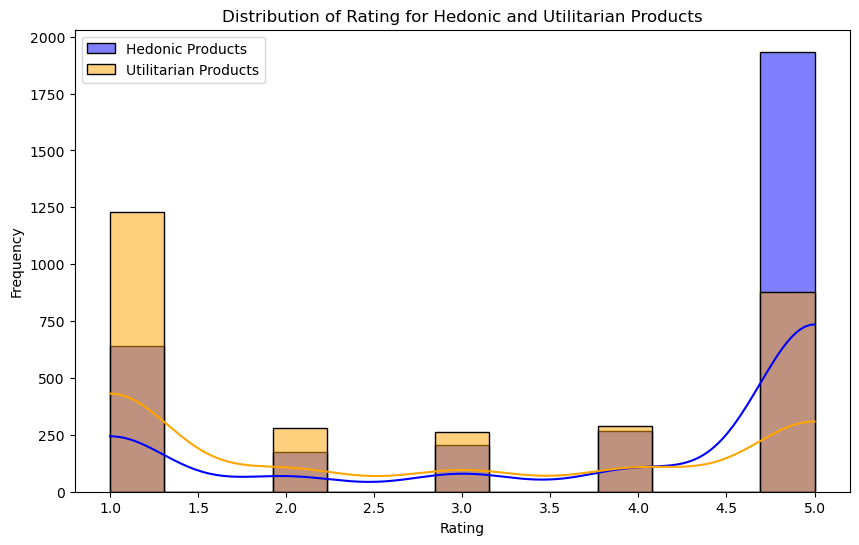

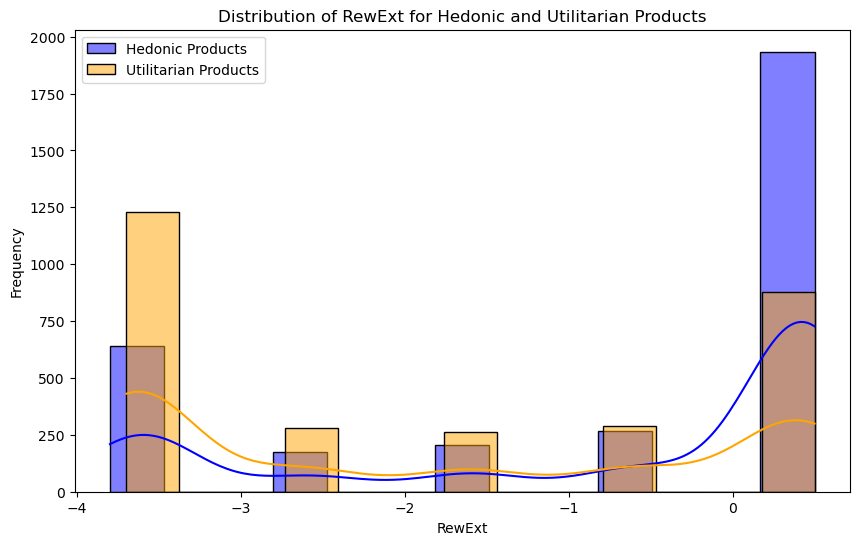

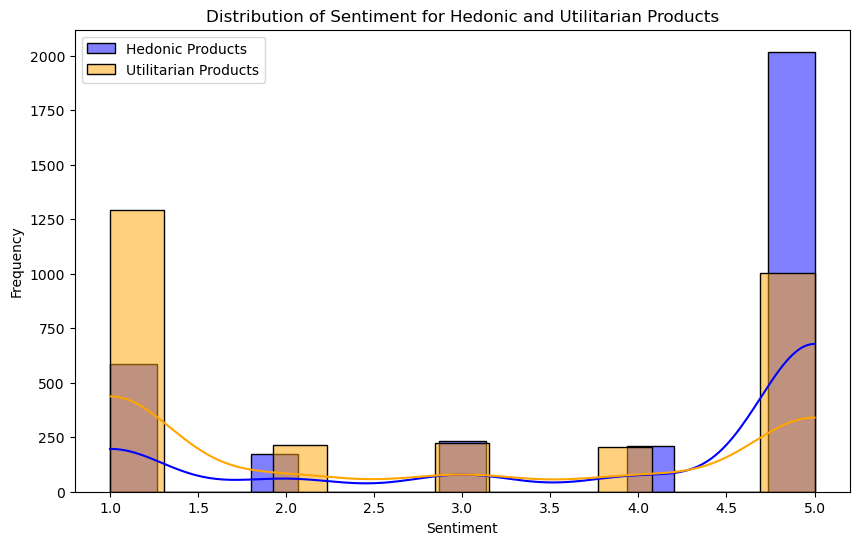

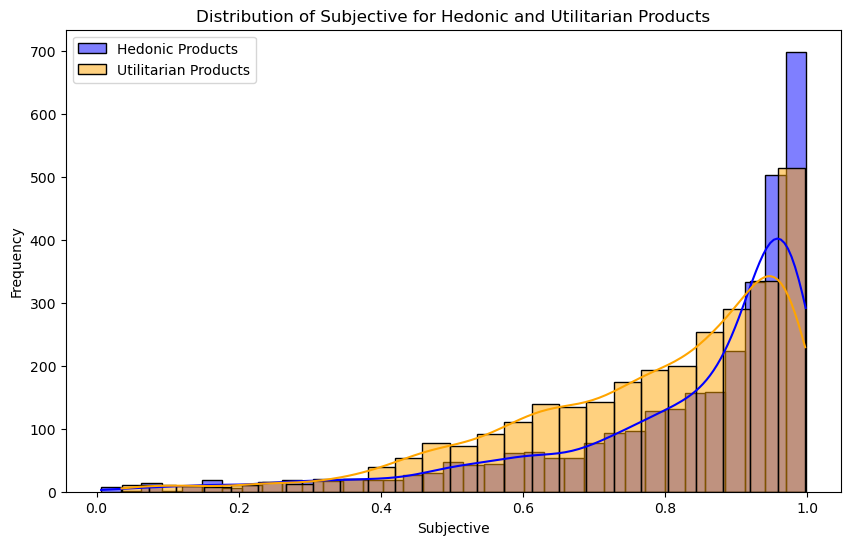

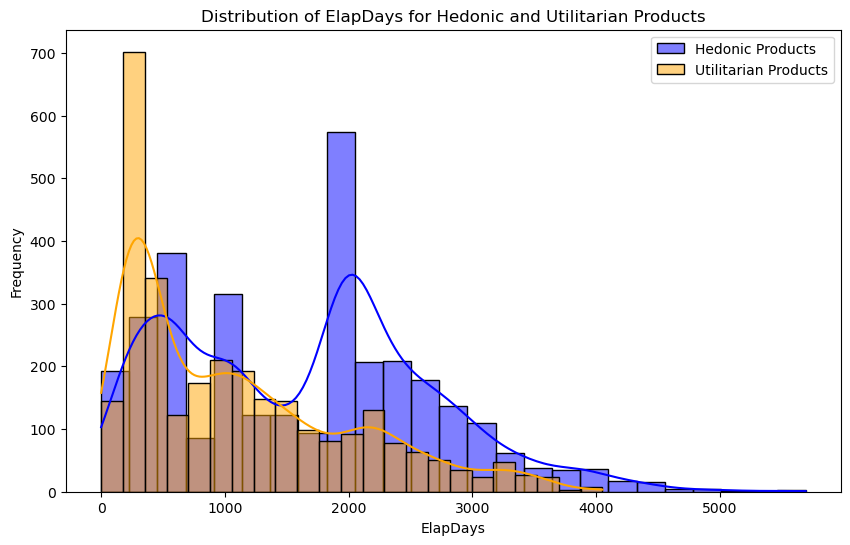

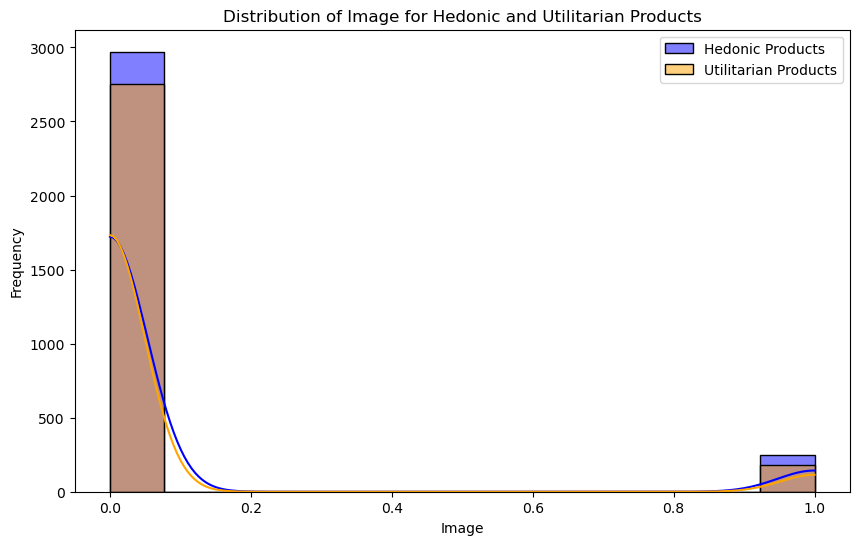

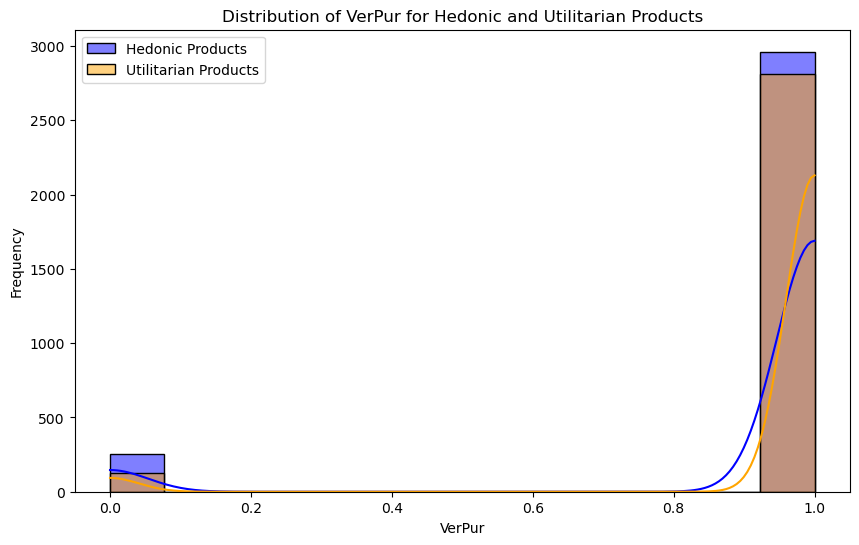

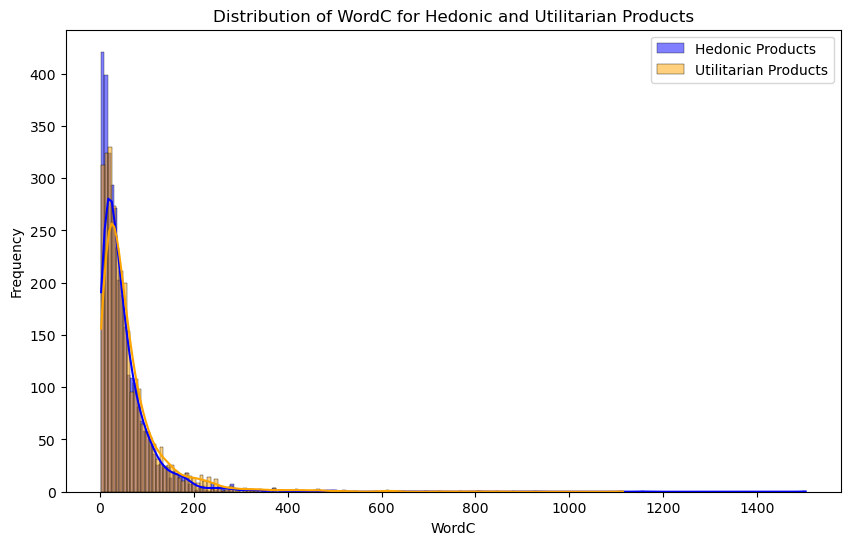

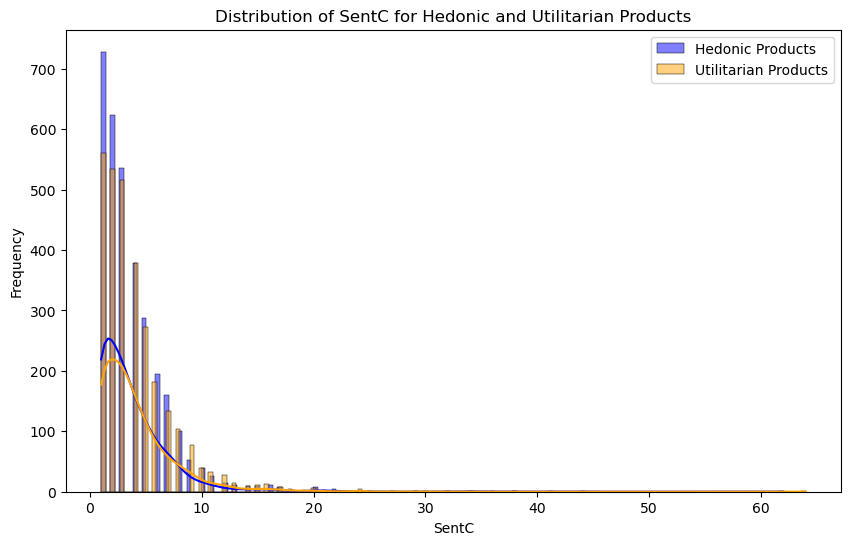

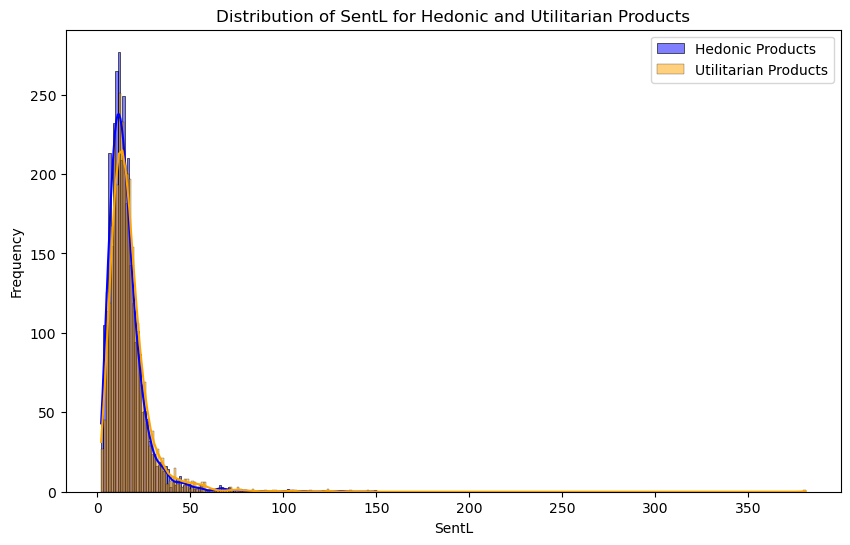

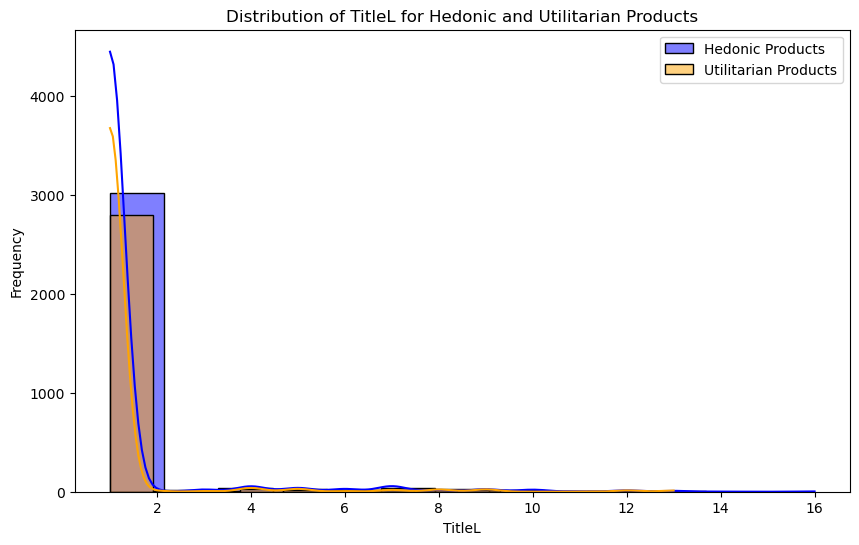

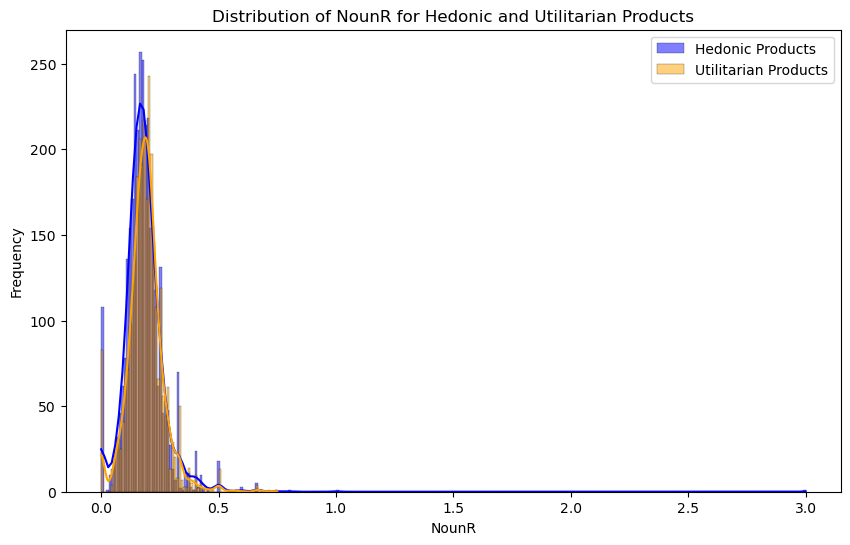

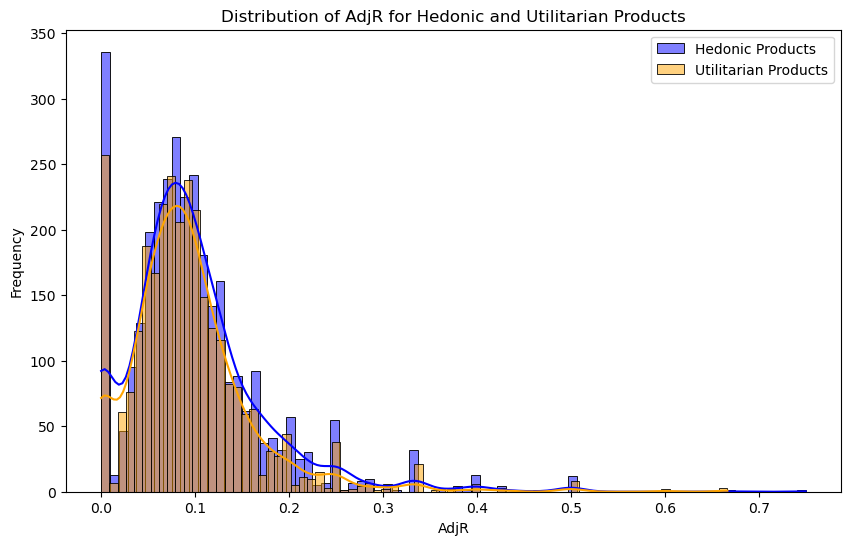

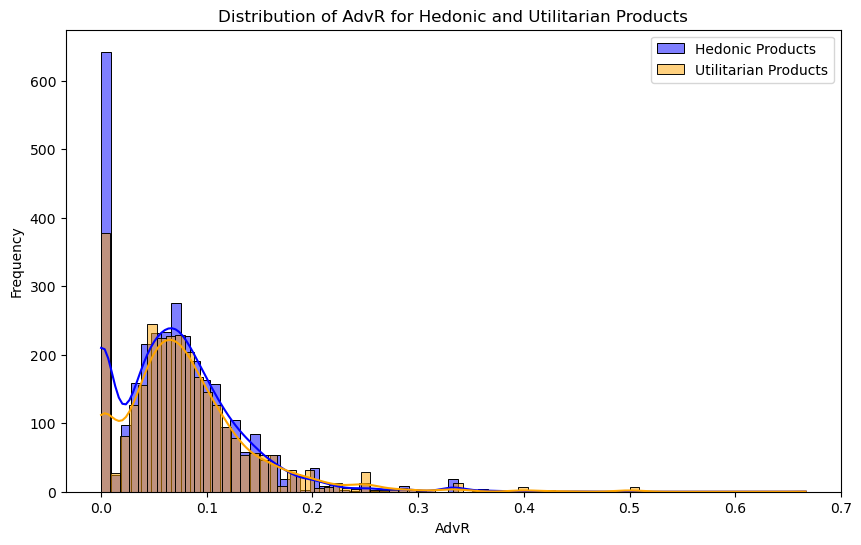

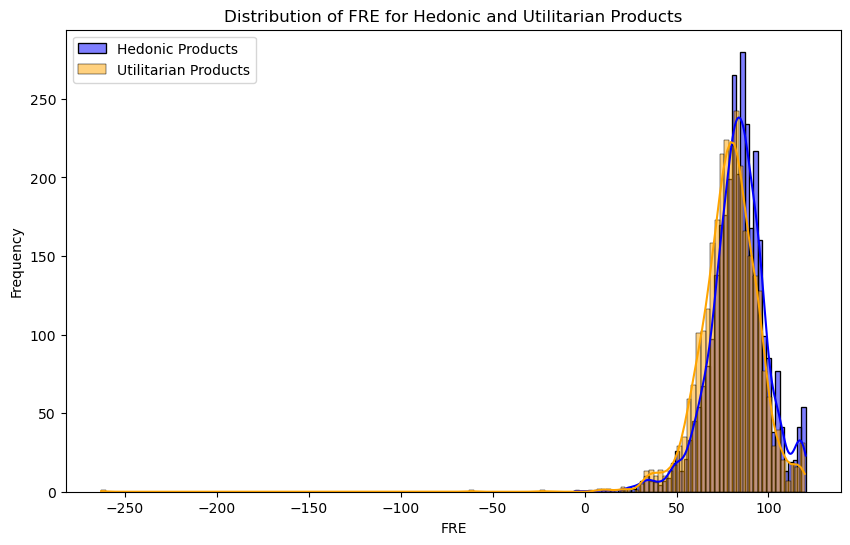

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features of interest
features =  ['helpful_ratio','Rating','RewExt','Sentiment','Subjective', 'ElapDays',
            'Image', 'VerPur','WordC', 'SentC', 'SentL', 'TitleL',  'NounR', 'AdjR', 'AdvR', 'FRE']

# Visualize the distribution of each feature for both hedonic and utilitarian products
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Plot histogram for hedonic products
    sns.histplot(data_hedonic[feature], color='blue', kde=True, label='Hedonic Products')
    
    # Plot histogram for utilitarian products
    sns.histplot(data_utilitarian[feature], color='orange', kde=True, label='Utilitarian Products')
    
    plt.title(f'Distribution of {feature} for Hedonic and Utilitarian Products')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


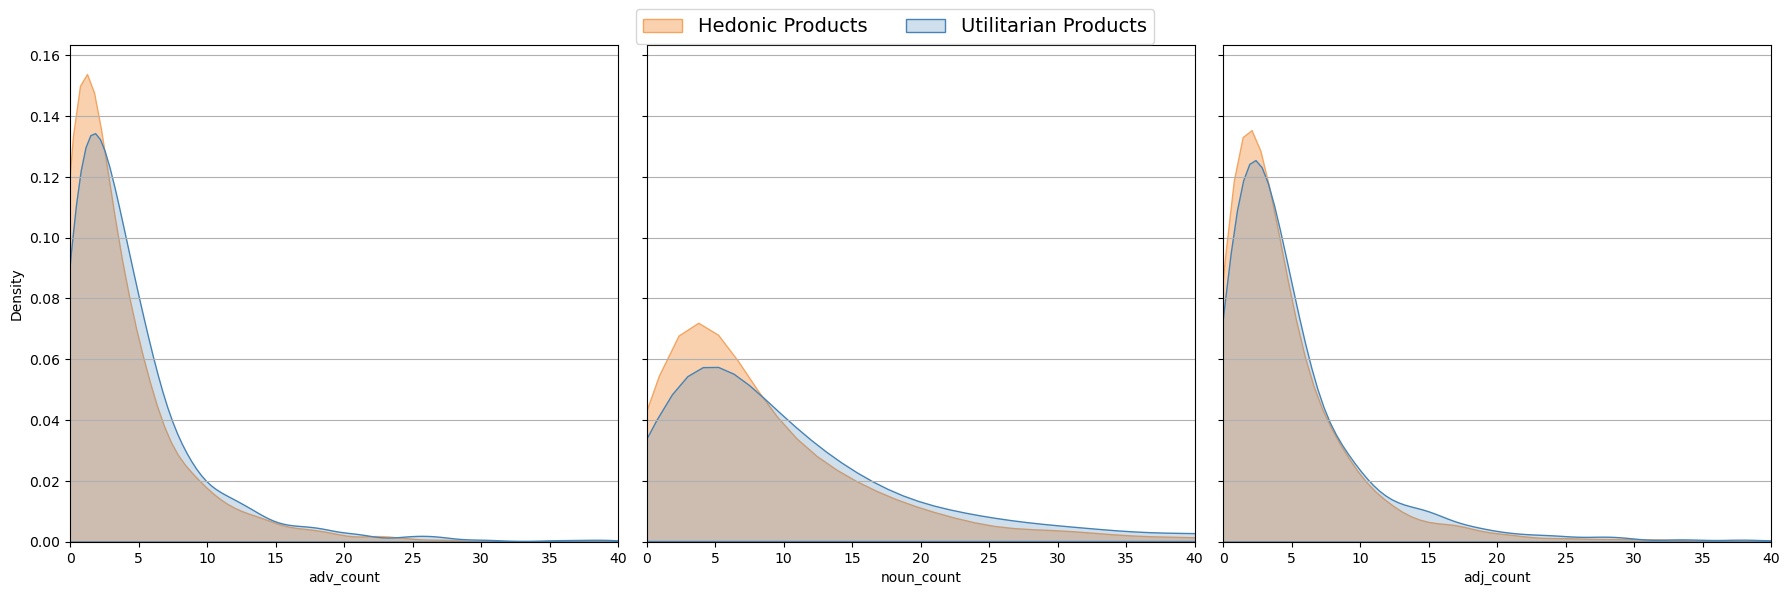

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Define the features of interest
features = ['adv_count', 'noun_count', 'adj_count']

# Set up the grid for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  
axes = axes.flatten()

# Find the overall x-axis and y-axis limits
x_min, x_max = 0, 40
y_max = 0

# Determine max y-axis value for proper scaling
for feature in features:
    data_combined = np.concatenate([data_hedonic[feature], data_utilitarian[feature]])
    kde = gaussian_kde(data_combined)
    y_vals = kde(np.linspace(x_min, x_max, 1000))
    combined_max_y = max(y_vals)
    if combined_max_y > y_max:
        y_max = combined_max_y

# Plot density plots
for i, feature in enumerate(features):
    ax = axes[i]
    sns.kdeplot(data=data_hedonic[feature], color='sandybrown', label='Hedonic Products', ax=ax, fill=True, alpha=0.5)
    sns.kdeplot(data=data_utilitarian[feature], color='steelblue', label='Utilitarian Products', ax=ax, fill=True)
    
    ax.set_xlabel(feature)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max * 1.1)  # Adjusted to provide some extra space above the maximum density
    ax.yaxis.grid(True) 
    
    if i == 0:  # Set y-axis label only for the leftmost plot
        ax.set_ylabel('Density')
    else:
        ax.set_ylabel('')  # Remove y-axis label for other plots
        ax.set_yticklabels([])  # Hide y-axis labels for other plots

    # Remove individual legends
    ax.legend().set_visible(False)

# Create a single legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc= 'upper center', ncol=2, fontsize=14)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make room for the legend
plt.show()


In [44]:
from scipy.stats import gaussian_kde

# Define the features of interest
features = ['Rating', 'SentimentC']

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5),dpi=1000)

sns.set_theme(style="whitegrid")

# Define the range for rating
x_range_rating = np.linspace(0, 6, 1000)
# Define the range for Sentiment Numerical
x_range_sentiment = np.linspace(-1, 3, 1000)

# Plot for 'Sentiment Numerical'
ax = axes[0]

# Plot KDE for hedonic products for Sentiment Numerical
hedonic_kde_sentiment = gaussian_kde(data_hedonic['SentimentC'])
hedonic_density_sentiment = hedonic_kde_sentiment(x_range_sentiment)
ax.plot(x_range_sentiment, hedonic_density_sentiment, color='sandybrown', label='Hedonic Products')
ax.fill_between(x_range_sentiment, hedonic_density_sentiment, color='sandybrown', alpha=0.6)

# Plot KDE for utilitarian products for Sentiment Numerical
utilitarian_kde_sentiment = gaussian_kde(data_utilitarian['SentimentC'])
utilitarian_density_sentiment = utilitarian_kde_sentiment(x_range_sentiment)
ax.plot(x_range_sentiment, utilitarian_density_sentiment, color='steelblue', label='Utilitarian Products')
ax.fill_between(x_range_sentiment, utilitarian_density_sentiment, color='steelblue', alpha=0.6)

# Set properties for Sentiment Numerical plot
ax.set_xlabel('Sentiment')
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(0,1.6)
ax.set_ylabel('')  # Remove y-axis label for the right plot
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Density')  # Show y-axis label only for the left plot
ax.yaxis.grid(False)
ax.xaxis.grid(False)


# Add horizontal gridlines for the y-axis manually
for y in np.linspace(ax.get_ylim()[1], ax.get_ylim()[0], 5)[1:-1]:
    ax.axhline(y=y, color='grey', linestyle='-', linewidth=0.4)

axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)

# Plot for 'rating'
ax = axes[1]

# Plot KDE for hedonic products for rating
hedonic_kde_rating = gaussian_kde(data_hedonic['Rating'])
hedonic_density_rating = hedonic_kde_rating(x_range_rating)
ax.plot(x_range_rating, hedonic_density_rating, color='sandybrown', label='Hedonic')
ax.fill_between(x_range_rating, hedonic_density_rating, color='sandybrown', alpha=0.6)

# Plot KDE for utilitarian products for rating
utilitarian_kde_rating = gaussian_kde(data_utilitarian['Rating'])
utilitarian_density_rating = utilitarian_kde_rating(x_range_rating)
ax.plot(x_range_rating, utilitarian_density_rating, color='steelblue', label='Utilitarian')
ax.fill_between(x_range_rating, utilitarian_density_rating, color='steelblue', alpha=0.6)

# Set properties for rating plot
ax.xaxis.grid(False)
ax.yaxis.grid(True)
ax.set_xlabel('Rating')
ax.set_xlim(0.1, 5.9)  # Limit x-axis to 5.5
ax.set_ylim(0, max(np.max(hedonic_density_rating), np.max(utilitarian_density_rating), np.max(hedonic_density_sentiment), np.max(utilitarian_density_sentiment)) * 1.1)
ax.legend(loc='upper right', title='Product Type', title_fontsize='medium',frameon=True)
ax.yaxis.set_visible(False)

axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)


# Add a big legend inside the right plot
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title='Product Type', title_fontsize='12', fontsize='12', loc='upper right', frameon=True)


# Add horizontal gridlines for the y-axis manually
for y in np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5)[1:-1]:
    ax.axhline(y=y, color='grey', linestyle='-', linewidth=0.4)

# Add gridlines for the x-axis

# Adjust layout
plt.tight_layout()
plt.show()


In [45]:
# Adding the 'helpful' column to the data dictionary
data['helpful'] = [votes >= 1 for votes in data['helpful_vote']]

# Creating the DataFrame with the updated data dictionary
data = pd.DataFrame(data)


# Display the updated DataFrame
print(data)

       Rating                                            title_x  \
0         5.0                                          Love this   
1         5.0  The fun games that you remember.. now on the N...   
2         5.0                                      So much fun!!   
3         5.0                              Wish this had more...   
4         5.0    It is the physical copy and it is a good price.   
...       ...                                                ...   
18296     5.0                                  Really cool mouse   
18297     3.0                         the clicks are not durable   
18298     5.0                                        Great mouse   
18299     1.0                 Double click issues after 3 months   
18300     1.0  Cable stopped working only 4 months after purc...   

                                                    text images        asin  \
0      My kids have so much fun with this game. Its a...     []  B01N1081RO   
1      These are 3 of the

In [47]:
# Apply log transformation to the 'word_count' and 'sent_length' columns
data['log_word_count'] = np.log1p(data['WordC'])
data['log_sent_length'] = np.log1p(data['SentL'])

# Map product types to labels
data['prod_type_label'] = data['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})

# Map helpful to descriptive labels
data['helpful_label'] = data['helpful'].map({True: 'Helpful Review', False: 'Unhelpful Review'})

# Set the theme
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=1000)

# Increase the font size of the x-axis and y-axis labels in the left plot
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot violin plot for log-transformed word_count
sns.violinplot(ax=axes[0], x="helpful_label", y="log_word_count", hue="prod_type_label",
               data=data, split=False, inner="box", palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"})
axes[0].set_ylabel("log (word_count)", size=12)
axes[0].set_xlabel("")
axes[0].legend_.remove()  # Remove legend from the first plot

# Set the y-axis limit for the first plot
y_max_word_count = data['log_word_count'].max()
axes[0].set_ylim(0, y_max_word_count * 1.045)

# Increase the font size of the x-axis and y-axis labels in the right plot
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

# Plot violin plot for log-transformed sent_length
sns.violinplot(ax=axes[1], x="helpful_label", y="log_sent_length", hue="prod_type_label",
               data=data, split=False, inner="box", palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"})
axes[1].set_ylabel("log (sent_length)", size=12)
axes[1].set_xlabel("")

# Set the y-axis limit for the second plot
y_max_sent_length = data['log_sent_length'].max()
axes[1].set_ylim(0, y_max_sent_length * 1.1)

# Add a big legend inside the right plot
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title='Product Type', title_fontsize='12', fontsize='12', loc='upper right', frameon=True)

plt.tight_layout()
plt.show()


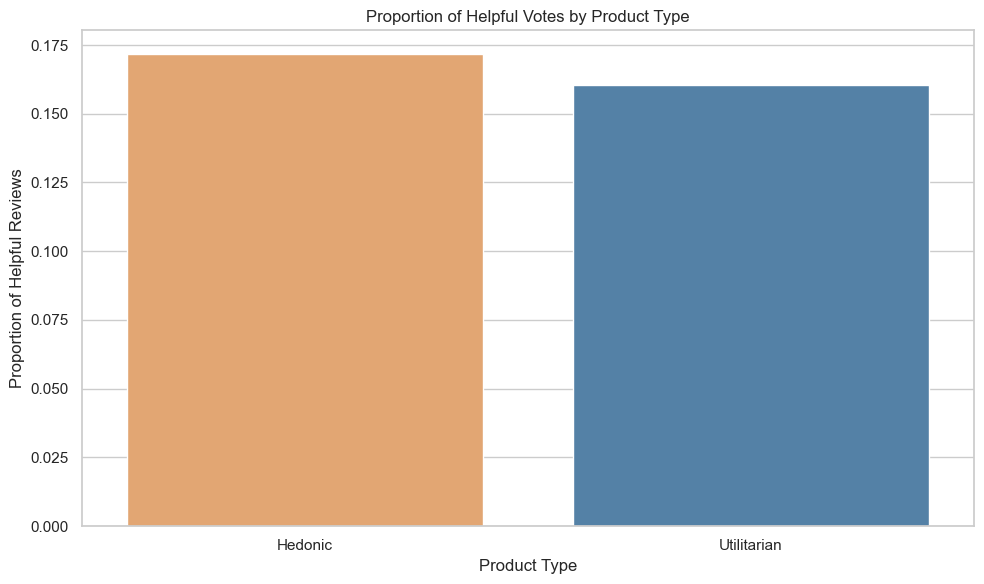

In [48]:
# Map product types to labels
data['prod_type_label'] = data['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})
data['helpful_label'] = data['helpful'].map({True: 'Helpful', False: 'Not Helpful'})

# Calculate the proportion of helpful reviews for each product type
helpful_proportion = data.groupby('prod_type_label')['helpful'].mean().reset_index()

# Set the theme
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='prod_type_label', y='helpful', data=helpful_proportion, palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"})

# Adjust the layout and display the plot
plt.ylabel("Proportion of Helpful Reviews")
plt.xlabel("Product Type")
plt.title("Proportion of Helpful Votes by Product Type")
plt.tight_layout()
plt.show()

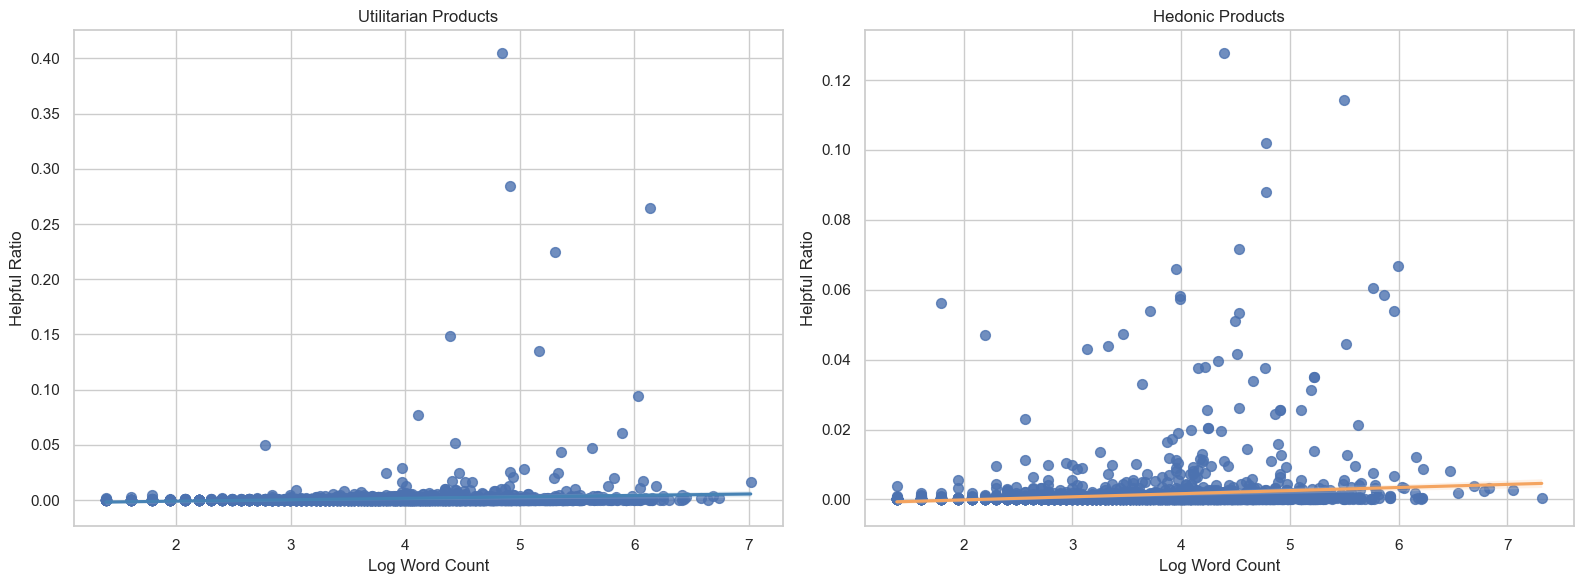

In [ ]:
# Log-transform the word_count
data_helpful['log_word_count'] = np.log1p(data_helpful['word_count'])

# Map product types to labels
data_helpful['prod_type_label'] = data_helpful['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})

# Set the theme
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with regression line for Utilitarian products
sns.regplot(ax=axes[0], x='log_word_count', y='helpful_ratio', data=data_helpful[data_helpful['prod_type'] == 0], scatter_kws={'s': 50}, line_kws={'color': 'steelblue'})
axes[0].set_title('Utilitarian Products')
axes[0].set_xlabel('Log Word Count')
axes[0].set_ylabel('Helpful Ratio')

# Scatter plot with regression line for Hedonic products
sns.regplot(ax=axes[1], x='log_word_count', y='helpful_ratio', data=data_helpful[data_helpful['prod_type'] == 1], scatter_kws={'s': 50}, line_kws={'color': 'sandybrown'})
axes[1].set_title('Hedonic Products')
axes[1].set_xlabel('Log Word Count')
axes[1].set_ylabel('Helpful Ratio')

plt.tight_layout()
plt.show()

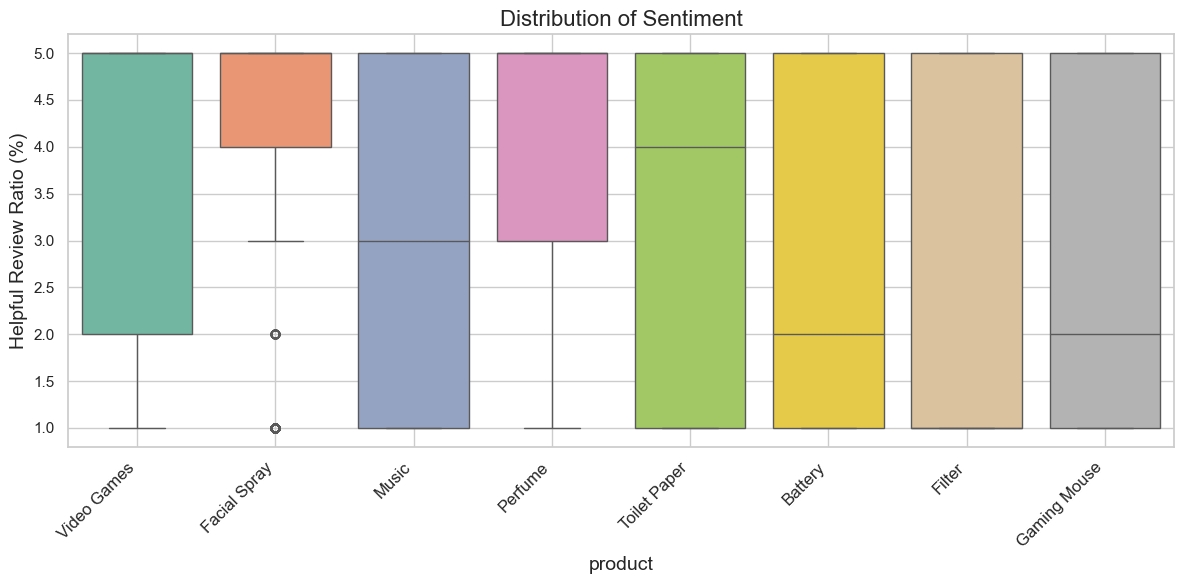

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot for hedonic products
plt.figure(figsize=(12, 6))
sns.boxplot(x='product', y='sentiment', data=data_helpful, palette='Set2')
plt.title('Distribution of Sentiment', fontsize=16)
plt.xlabel('product', fontsize=14)
plt.ylabel('Helpful Review Ratio (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


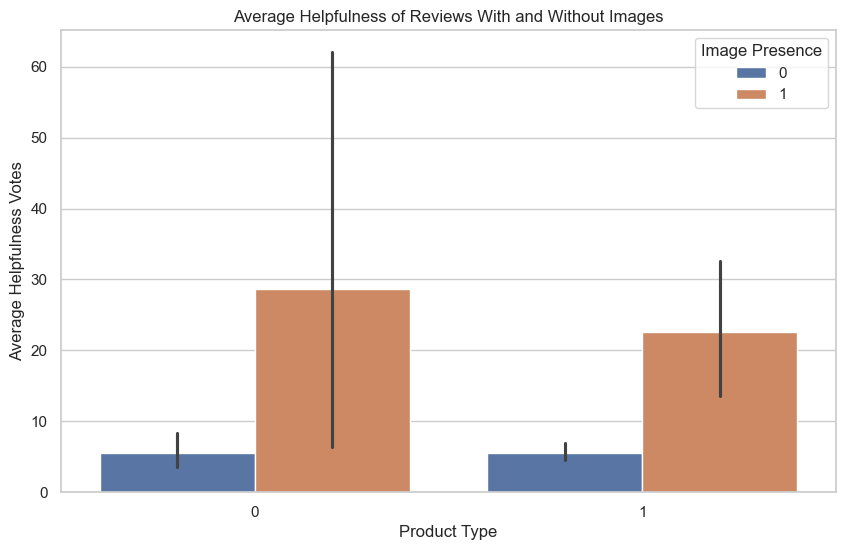

In [ ]:
# Calculate average helpfulness for reviews with and without images
avg_helpfulness = data_helpful.groupby(['prod_type', 'image'])['helpful_vote'].mean

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=data_helpful, x='prod_type', y='helpful_vote', hue='image')
plt.title('Average Helpfulness of Reviews With and Without Images')
plt.xlabel('Product Type')
plt.ylabel('Average Helpfulness Votes')
plt.legend(title='Image Presence')
plt.show()

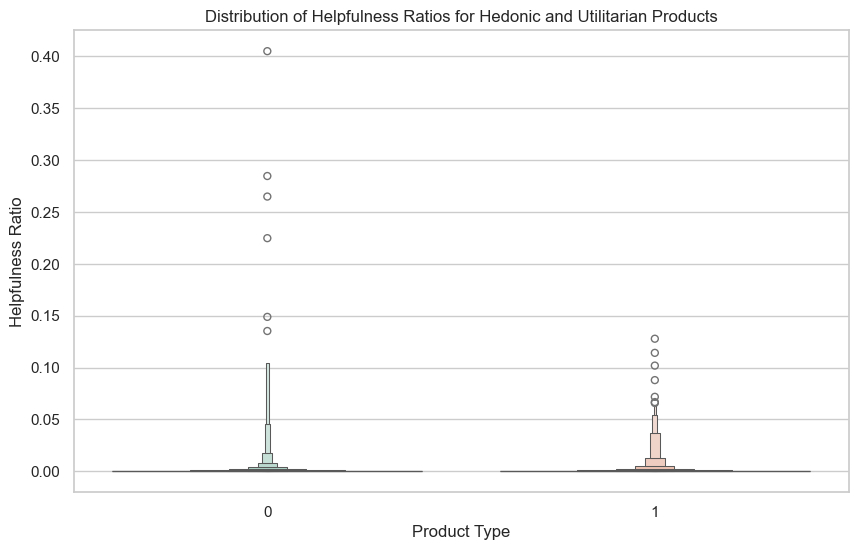

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxenplot(data=data_helpful, x='prod_type', y='helpful_ratio', palette='Set2')
plt.title('Distribution of Helpfulness Ratios for Hedonic and Utilitarian Products')
plt.xlabel('Product Type')
plt.ylabel('Helpfulness Ratio')
plt.show()
